In [1]:
import matplotlib, sys,  os
os.environ['OPENBLAS_NUM_THREADS'] = '1'
os.environ['OMP_NUM_THREADS'] = '1'
os.environ['MKL_NUM_THREADS'] = '1'
os.environ['NUMEXPR_NUM_THREADS'] = '1'
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"
sys.path.append("./mylib/")

import numpy as np
matplotlib.use('Agg')
import matplotlib.pyplot as plt

np.seterr(all="ignore")
from threeML import *
from WCDA_hal import HAL, HealpixConeROI, HealpixMapROI
import traceback
silence_warnings()
import warnings
warnings.simplefilter("ignore")
silence_warnings()
from threeML import silence_progress_bars, activate_progress_bars, toggle_progress_bars
from threeML.utils.progress_bar import trange

from astropy.io import fits
from astropy.wcs import WCS
from astropy.coordinates import SkyCoord
from astropy import units as u
# from astropy.visualization import astropy_mpl_style, imshAow_norm
from astropy.coordinates import Angle

import healpy as hp

from tqdm import tqdm

# from mylib import *
import mylib as my
from importlib import reload

Welcome to JupyROOT 6.24/06


19:03:30 WARNING   The GSL library or the pygsl wrapper cannot be loaded. Models that depend on it  ]8;id=376820;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/astromodels/functions/functions_1D/functions.py\functions.py]8;;\:]8;id=783042;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/astromodels/functions/functions_1D/functions.py#71\71]8;;\
                  will not be available.                                                                           

/data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/numba/core/decorators.py:262: NumbaDeprecationWarning: numba.generated_jit is deprecated. Please see the documentation at: https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-generated-jit for more information and advice on a suitable replacement.
  warnings.warn(msg, NumbaDeprecationWarning)
/data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/numba/core/decorators.py:262: NumbaDeprecationWarning: numba.generated_jit is deprecated. Please see the documentation at: https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-generated-jit for more information and advice on a suitable replacement.
  warnings.warn(msg, NumbaDeprecationWarning)


19:03:31 INFO      Starting 3ML!                                                                     ]8;id=325333;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/__init__.py\__init__.py]8;;\:]8;id=137229;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/__init__.py#35\35]8;;\

         WARNING   WARNINGs here are NOT errors                                                      ]8;id=405394;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/__init__.py\__init__.py]8;;\:]8;id=16027;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/__init__.py#36\36]8;;\

         WARNING   but are inform you about optional packages that can be installed                  ]8;id=391537;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/__init__.py\__init__.py]8;;\:]8;id=426099;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/__init__.py#37\37]8;;\

         WARNING    to disable these messages, turn off start_warning in your config file            ]8;id=403047;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/__init__.py\__init__.py]8;;\:]8;id=852739;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/__init__.py#40\40]8;;\

19:03:31 WARNING   The cthreeML package is not installed. You will not be able to use plugins which  ]8;id=690642;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/__init__.py\__init__.py]8;;\:]8;id=531290;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/__init__.py#94\94]8;;\
                  require the C/C++ interface (currently HAWC)                                                     

         WARNING   Could not import plugin FermiLATLike.py. Do you have the relative instrument     ]8;id=305986;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/__init__.py\__init__.py]8;;\:]8;id=116269;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/__init__.py#144\144]8;;\
                  software installed and configured?                                                               

         WARNING   Could not import plugin HAWCLike.py. Do you have the relative instrument         ]8;id=958195;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/__init__.py\__init__.py]8;;\:]8;id=677703;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/__init__.py#144\144]8;;\
                  software installed and configured?                                                               

19:03:32 WARNING   No fermitools installed                                              ]8;id=919523;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/utils/data_builders/fermi/lat_transient_builder.py\lat_transient_builder.py]8;;\:]8;id=444000;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/utils/data_builders/fermi/lat_transient_builder.py#44\44]8;;\

Load sub from Myspeedup: 100%|██████████| 37/37 [00:00<00:00, 93.51it/s]   

Yourlib init successfully!!!


(98.173828125, 6.016664062525166)


<Figure size 640x480 with 0 Axes>

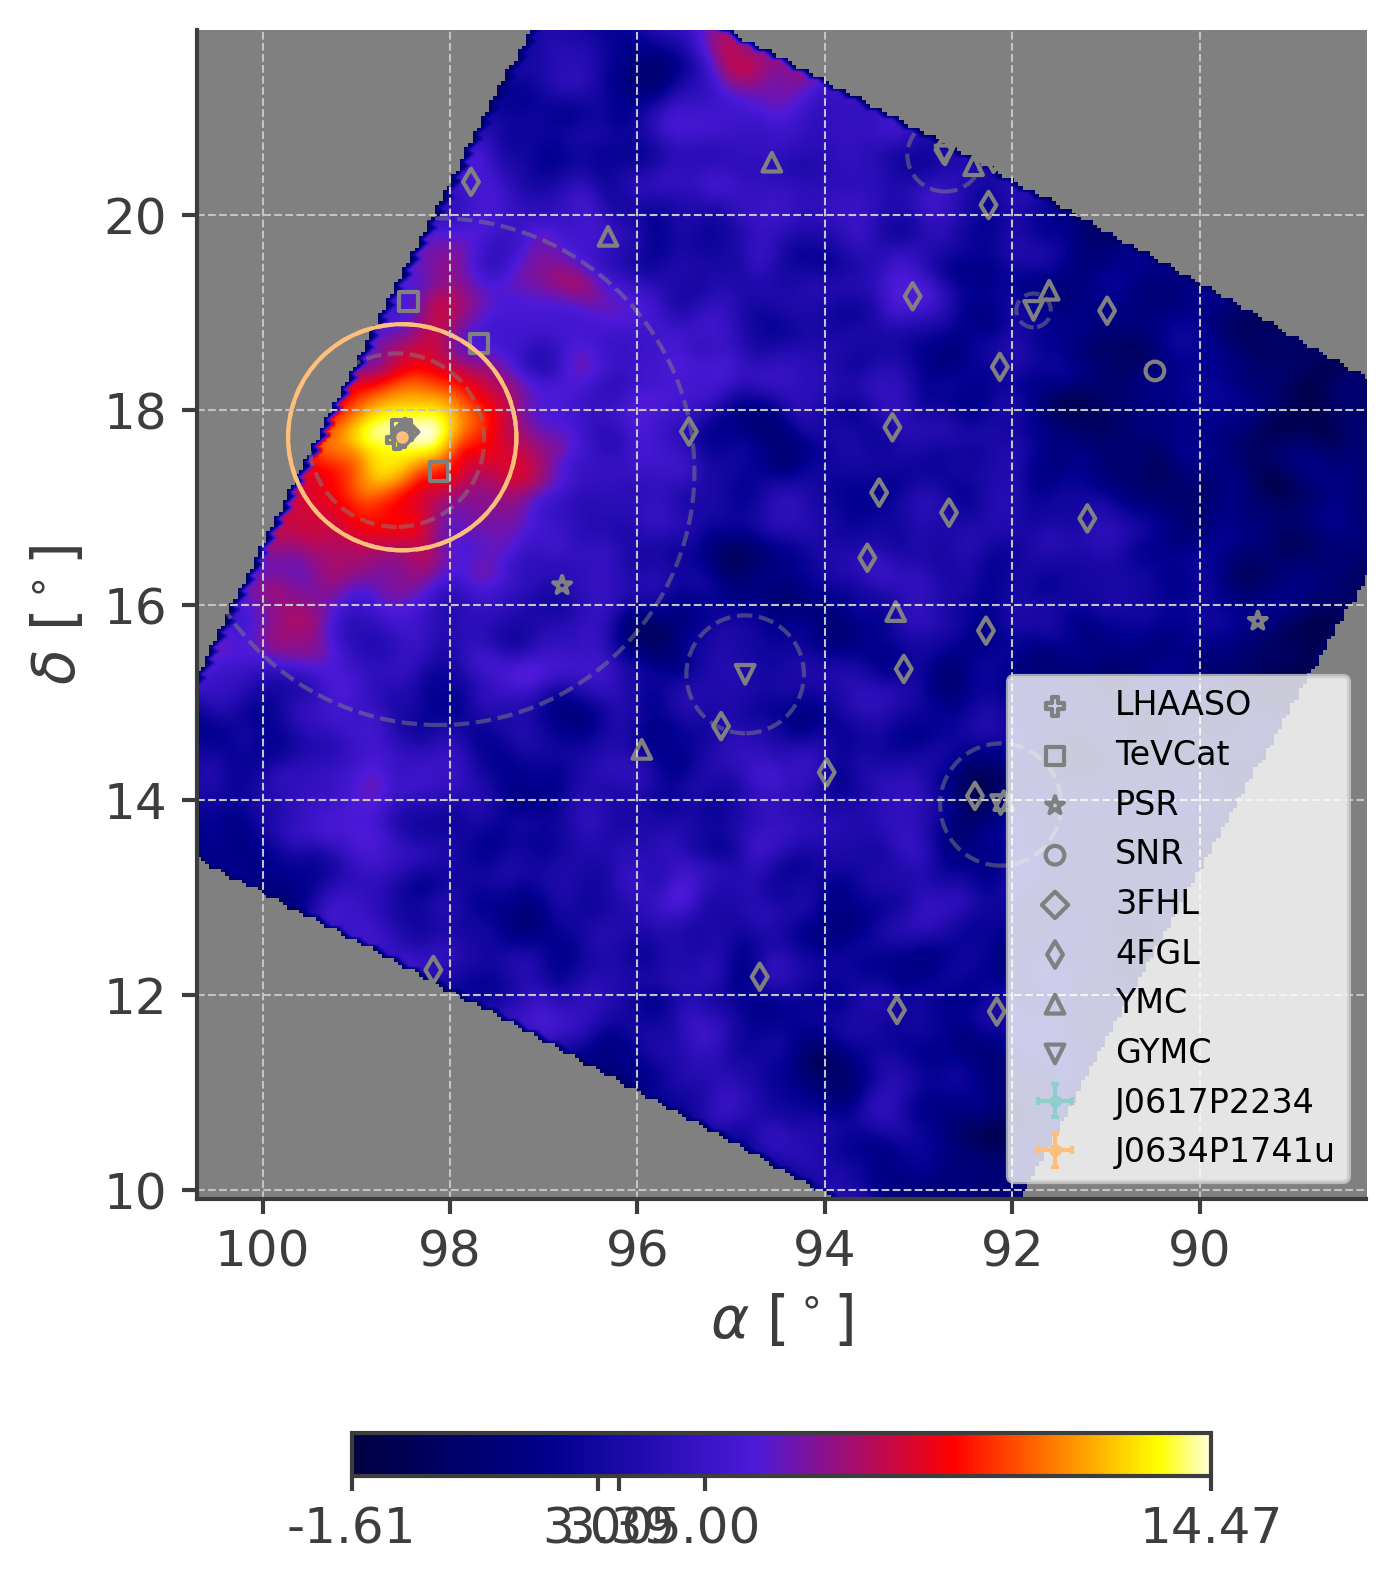

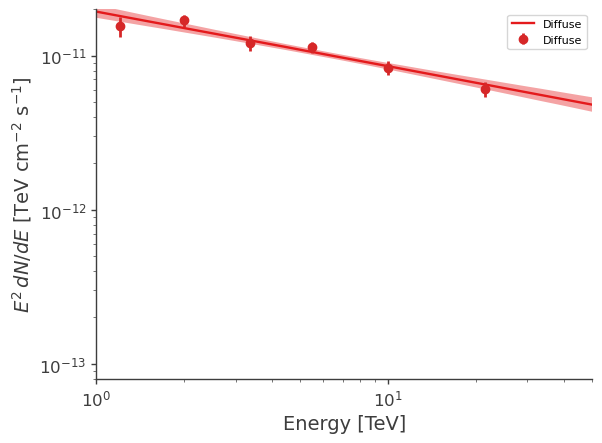

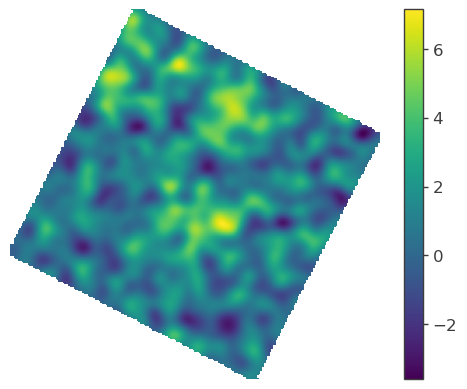

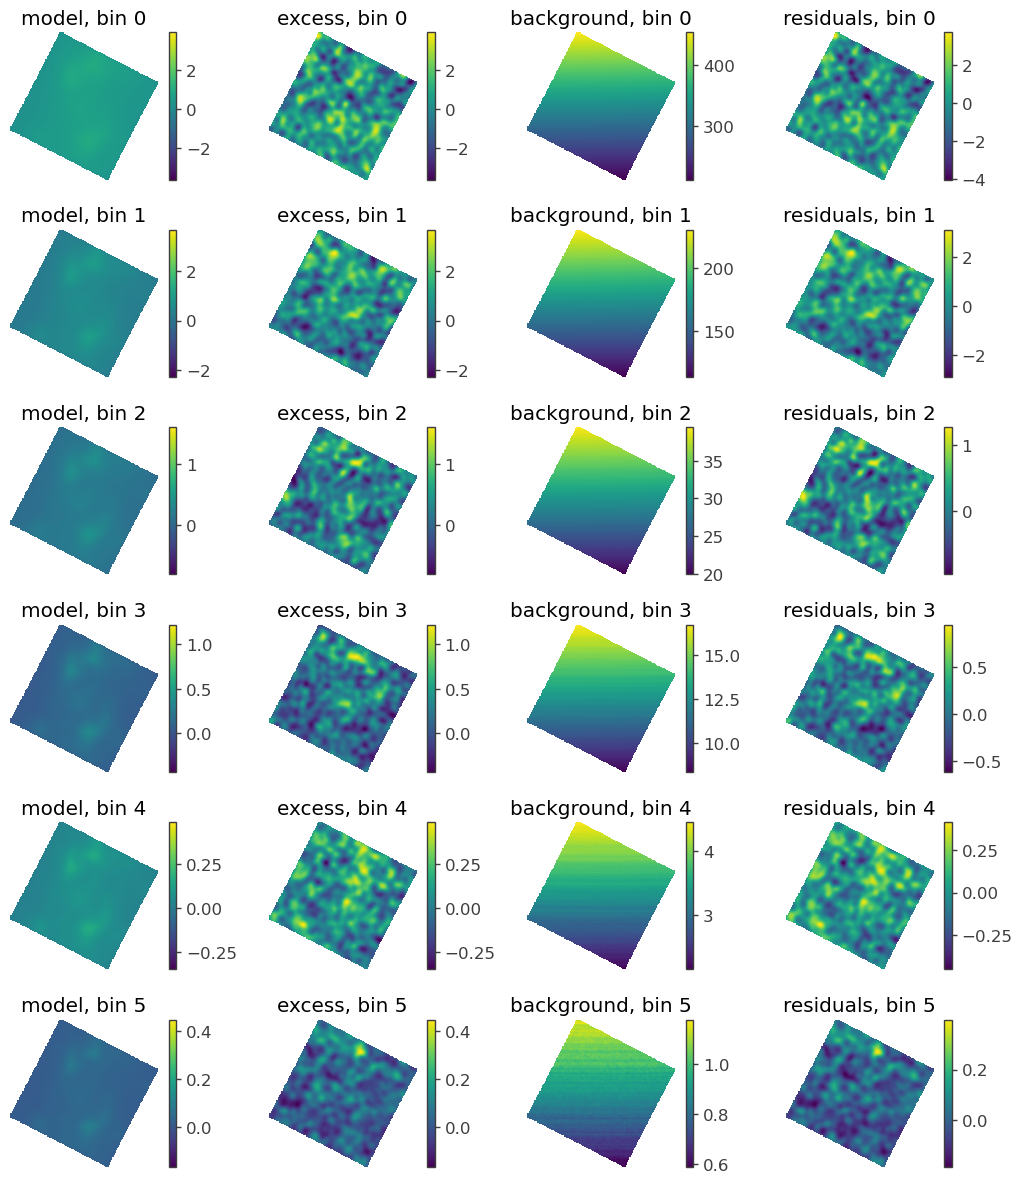

<Figure size 640x480 with 0 Axes>

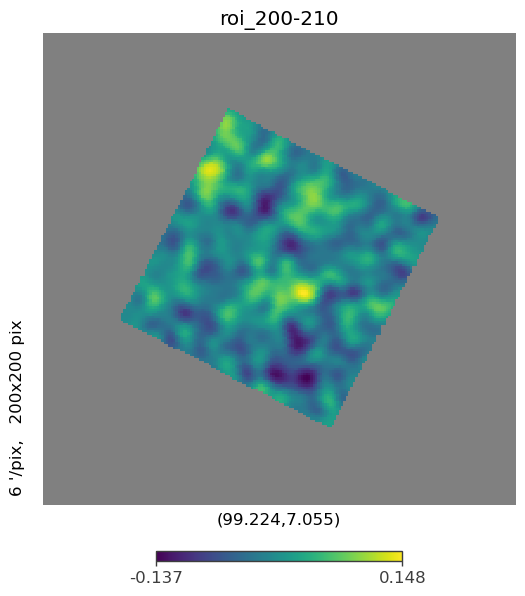

LHAASO:  1 97.77 10.67  1LHAASO J0631+1040  0.0
LHAASO:  2 97.77 10.67  1KM2A J0631+1040  0
LHAASO:  3 98.76 6.33  1LHAASO J0635+0619  0.6
LHAASO:  4 98.76 6.33  1KM2A J0635+0619  0
TeVCat:  1 97.78083333333332 10.731388888888889 3HWC J0631+107 0.0
TeVCat:  2 97.95508333333332 10.570194444444445 0FGL J0631.8+1034 0.0
TeVCat:  3 98.25333333333332 5.7941666666666665 HESS J0632+057 0.0
TeVCat:  4 98.71 7.0 HAWC J0635+070 0.65
PSR:  1 95.29674999999999 3.612638888888889 J0621+0336
PSR:  2 95.34212499999998 10.044083333333333 J0621+1002
PSR:  3 95.94483333333332 3.6685555555555553 J0623+0340
PSR:  4 96.4375 10.266666666666667 J0625+10
PSR:  5 96.93404166666666 7.109249999999999 J0627+0706
PSR:  6 96.97345833333333 6.8316944444444445 J0627+0649
PSR:  7 97.15074999999999 9.153861111111112 J0628+0909
PSR:  8 97.86466666666666 10.617361111111112 J0631+1036
PSR:  9 98.43420833333332 6.543027777777778 J0633+0632
PSR:  10 98.82499999999999 5.553055555555555 J0635+0533
PSR:  11 101.62912499999999 9

Best fit values:

result             unit
parameter                                                                 
Diffuse.spectrum.main.PowerlawM.K  (7.4 +/- 2.4) x 10^-22  1 / (keV s cm2)

Correlation matrix:

1.00

Values of -log(likelihood) at the minimum:

-log(likelihood)
WCDA        1181.420219
total       1181.420219

Values of statistical measures:

statistical measures
AIC           2364.840459
BIC           2374.956432

Best fit values:

result             unit
parameter                                                                   
Diffuse.spectrum.main.PowerlawM.K  (1.19 +/- 0.19) x 10^-21  1 / (keV s cm2)

Correlation matrix:

1.00

Values of -log(likelihood) at the minimum:

-log(likelihood)
WCDA        1299.540519
total       1299.540519

Values of statistical measures:

statistical measures
AIC           2601.081059
BIC           2611.197032

Best fit values:

result             unit
parameter                                                                   
Diffuse.spectrum.main.PowerlawM.K  (1.59 +/- 0.22) x 10^-21  1 / (keV s cm2)

Correlation matrix:

1.00

Values of -log(likelihood) at the minimum:

-log(likelihood)
WCDA        1314.328361
total       1314.328361

Values of statistical measures:

statistical measures
AIC           2630.656743
BIC           2640.772716

Best fit values:

result             unit
parameter                                                                   
Diffuse.spectrum.main.PowerlawM.K  (1.62 +/- 0.18) x 10^-21  1 / (keV s cm2)

Correlation matrix:

1.00

Values of -log(likelihood) at the minimum:

-log(likelihood)
WCDA        1296.888819
total       1296.888819

Values of statistical measures:

statistical measures
AIC           2595.777661
BIC           2605.893634

Best fit values:

result             unit
parameter                                                                   
Diffuse.spectrum.main.PowerlawM.K  (1.35 +/- 0.20) x 10^-21  1 / (keV s cm2)

Correlation matrix:

1.00

Values of -log(likelihood) at the minimum:

-log(likelihood)
WCDA        1264.374214
total       1264.374214

Values of statistical measures:

statistical measures
AIC           2530.748449
BIC           2540.864422

Best fit values:

result             unit
parameter                                                                   
Diffuse.spectrum.main.PowerlawM.K  (1.06 +/- 0.20) x 10^-21  1 / (keV s cm2)

Correlation matrix:

1.00

Values of -log(likelihood) at the minimum:

-log(likelihood)
WCDA        1226.651555
total       1226.651555

Values of statistical measures:

statistical measures
AIC           2455.303132
BIC           2465.419105



100%|██████████| 6/6 [00:32<00:00,  5.45s/it]


processing MLE analyses:   0%|          | 0/1 [00:00<?, ?it/s]

Propagating errors:   0%|          | 0/30 [00:00<?, ?it/s]

20:26:10 INFO      Region of Interest:                                                                   ]8;id=873951;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=60;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#291\291]8;;\

         INFO      -------------------                                                                   ]8;id=13655;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=999213;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#292\292]8;;\

         INFO      HealpixMapROI: Center (R.A., Dec) = (103.803, -1.840), model radius:      ]8;id=515046;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/region_of_interest/healpix_map_roi.py\healpix_map_roi.py]8;;\:]8;id=294401;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/region_of_interest/healpix_map_roi.py#134\134]8;;\
                  8.000 deg, display radius: 6.000 deg, threshold = 0.50                                           

         INFO                                                                                            ]8;id=136966;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=403641;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#295\295]8;;\

         INFO      Flat sky projection:                                                                  ]8;id=610560;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=382320;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#296\296]8;;\

         INFO      --------------------                                                                  ]8;id=385290;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=633771;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#297\297]8;;\

         INFO      Width x height 80 x 80 px                                                             ]8;id=557388;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=607074;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#299\299]8;;\

         INFO      Pixel sizes: 0.2 deg                                                                  ]8;id=780317;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=678303;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#304\304]8;;\

         INFO                                                                                            ]8;id=478074;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=182764;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#307\307]8;;\

         INFO      Response:                                                                             ]8;id=24211;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=685592;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#308\308]8;;\

         INFO      ---------                                                                             ]8;id=313570;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=958942;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#309\309]8;;\

         INFO      Response file:                                                                   ]8;id=798237;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/response/response.py\response.py]8;;\:]8;id=605244;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/response/response.py#340\340]8;;\
                  /data/home/cwy/Science/3MLWCDA/Standard/src/../../data/DR_ihep_MK2_newoldDRpsf.ro                
                  ot                                                                                               

         INFO      Number of dec bins: 110                                                          ]8;id=448684;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/response/response.py\response.py]8;;\:]8;id=183812;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/response/response.py#341\341]8;;\

         INFO      Number of energy/nHit planes per dec bin_name: 6                                 ]8;id=294759;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/response/response.py\response.py]8;;\:]8;id=282061;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/response/response.py#344\344]8;;\

         INFO                                                                                            ]8;id=569928;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=484742;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#313\313]8;;\

         INFO      Map Tree:                                                                             ]8;id=779061;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=465994;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#314\314]8;;\

         INFO      ----------                                                                            ]8;id=555345;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=983195;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#315\315]8;;\

Bin  Nside Scheme    Obs counts    Bkg counts   obs/bkg  Pixels in ROI   
0   0   1024   RING  5.387764e+06  5.382161e+06  1.001041          30468  \
1   1   1024   RING  2.906185e+06  2.902345e+06  1.001323          30468   
2   2   1024   RING  5.165502e+05  5.146388e+05  1.003714          30468   
3   3   1024   RING  2.155481e+05  2.144545e+05  1.005099          30468   
4   4   1024   RING  5.450699e+04  5.433214e+04  1.003218          30468   
5   5   1024   RING  1.504473e+04  1.490890e+04  1.009111          30468   

   Area (deg^2)  
0     99.889058  
1     99.889058  
2     99.889058  
3     99.889058  
4     99.889058  
5     99.889058

         INFO      This Map Tree contains 795.961 transits in the first bin                         ]8;id=184441;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/maptree/map_tree.py\map_tree.py]8;;\:]8;id=248106;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/maptree/map_tree.py#149\149]8;;\

         INFO      Total data size: 2.92 Mb                                                         ]8;id=800705;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/maptree/map_tree.py\map_tree.py]8;;\:]8;id=143389;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/maptree/map_tree.py#151\151]8;;\

         INFO                                                                                            ]8;id=905680;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=907292;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#319\319]8;;\

         INFO      Active energy/nHit planes (6):                                                        ]8;id=150784;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=962875;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#321\321]8;;\

         INFO      -------------------------------                                                       ]8;id=31869;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=84716;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#322\322]8;;\

         INFO      ['0', '1', '2', '3', '4', '5']                                                        ]8;id=185038;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=38948;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#323\323]8;;\

20:26:12 INFO      Set diffuse range: [208, 222] [-7, 7]                                               ]8;id=579476;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=423529;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#852\852]8;;\

         INFO      ra dec coner:                                                                       ]8;id=667666;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=16378;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#853\853]8;;\

         INFO      (94.38304891036078, 1.16738760432483)                                               ]8;id=101002;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=780293;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#854\854]8;;\

         INFO      (100.68994261043953, -11.232690698607659)                                           ]8;id=203257;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=202079;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#855\855]8;;\

         INFO      (113.25402941513612, -4.798578341830175)                                            ]8;id=990747;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=479175;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#856\856]8;;\

         INFO      (106.8827698758357, 7.557103426992251)                                              ]8;id=941521;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=60689;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#857\857]8;;\

         INFO      diffuse file path: ../../data/Diffuse_dust_bkg_template.fits                        ]8;id=761895;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=167527;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#914\914]8;;\

Model summary:
==============

                  N
Point sources     0
Extended sources  1
Particle sources  0

Free parameters (2):
--------------------

                                      value min_value max_value   
Diffuse.spectrum.main.Powerlaw.K        0.0       0.0       0.0  \
Diffuse.spectrum.main.Powerlaw.index -2.733      -4.0      -1.0   

                                                unit  
Diffuse.spectrum.main.Powerlaw.K      keV-1 s-1 cm-2  
Diffuse.spectrum.main.Powerlaw.index                  

Fixed parameters (4):
---------------------

                                                                                value   
Diffuse.SpatialTemplate_2D.K                                                      1.0  \
Diffuse.SpatialTemplate_2D.hash     1334522455744923255853502090702720987701237788...   
Diffuse.SpatialTemplate_2D.ihdu                                                   0.0   
Diffuse.spectrum.main.Powerlaw.piv                                       3000000000.0   

                                   min_value max_value   unit  
Diffuse.SpatialTemplate_2D.K            None      None  deg-2  
Diffuse.SpatialTemplate_2D.hash         None      None         
Diffuse.SpatialTemplate_2D.ihdu          0.0      None         
Diffuse.spectrum.main.Powerlaw.piv      None      None    keV  

Properties (2):
--------------------

                                                                          value   
Diffuse.SpatialTemplate_2D.fits_file  ../../data/Diffuse_dust_bkg_template.fits  \
Diffuse.SpatialTemplate_2D.frame                                           icrs   

                                                            allowed values  
Diffuse.SpatialTemplate_2D.fits_file                                  None  
Diffuse.SpatialTemplate_2D.frame      [icrs, galactic, fk5, fk4, fk4_no_e]  

Linked parameters (0):
----------------------

(none)

Independent variables:
----------------------

(none)

Linked functions (0):
----------------------

(none)

20:26:13 INFO      Considering 19 dec bins for extended source Diffuse              ]8;id=197081;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=847890;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#89\89]8;;\

         INFO      Central bin is bin at Declination = -1.882                       ]8;id=399662;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=249613;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#98\98]8;;\

         INFO      set the minimizer to minuit                                             ]8;id=590715;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=631198;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py#1042\1042]8;;\

         INFO      set the minimizer to ROOT                                               ]8;id=137948;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=378439;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py#1059\1059]8;;\

Best fit values:

result   
parameter                                                        
Diffuse.spectrum.main.Powerlaw.K      (7.2 -1.5 +1.9) x 10^-22  \
Diffuse.spectrum.main.Powerlaw.index            -2.82 +/- 0.23   

                                                 unit  
parameter                                              
Diffuse.spectrum.main.Powerlaw.K      1 / (keV s cm2)  
Diffuse.spectrum.main.Powerlaw.index

Correlation matrix:

1.00 -0.26
-0.26  1.00

Values of -log(likelihood) at the minimum:

-log(likelihood)
WCDA         6618.32959
total        6618.32959

Values of statistical measures:

statistical measures
AIC          13240.659246
BIC          13260.891563

Smoothing planes:   0%|          | 0/6 [00:00<?, ?it/s]

(107.6220703125, 0.9698967550241093)


<Figure size 640x480 with 0 Axes>

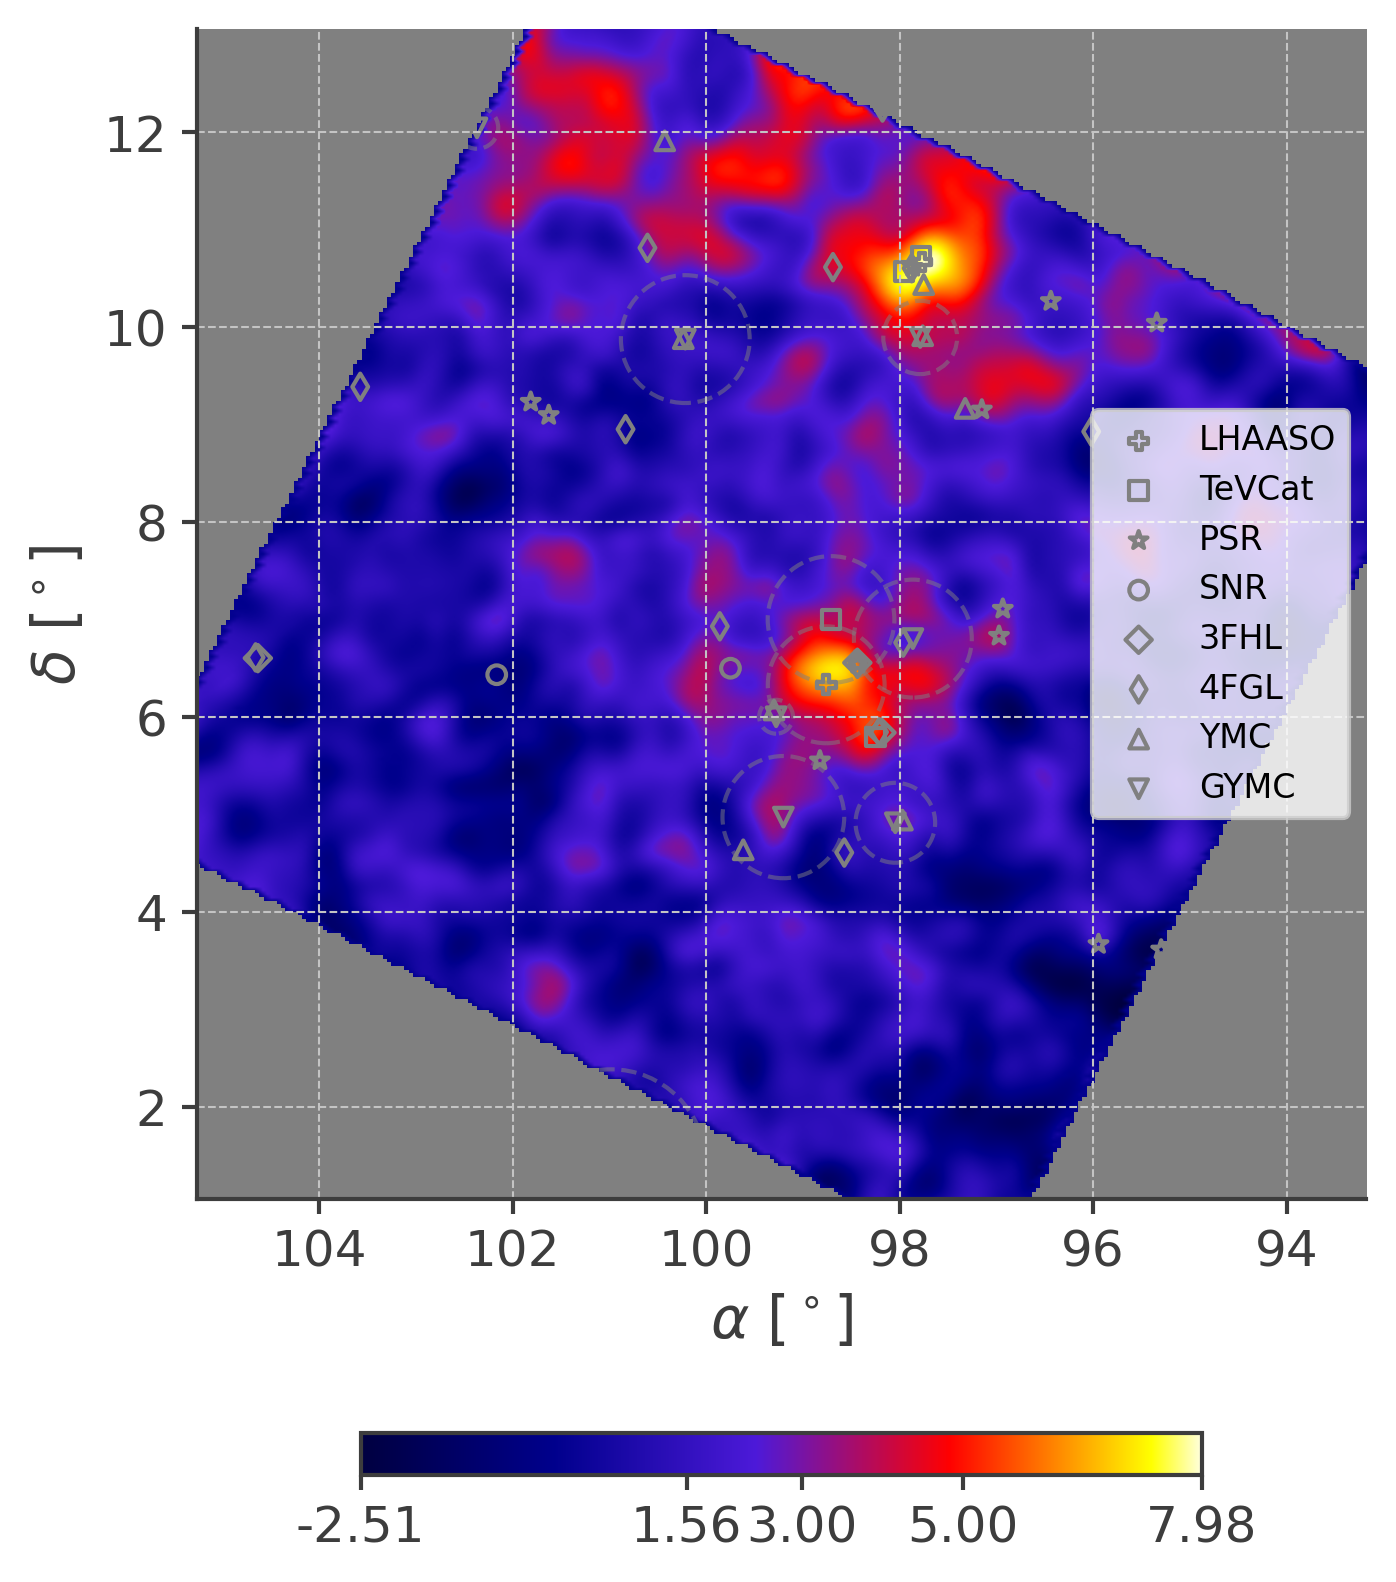

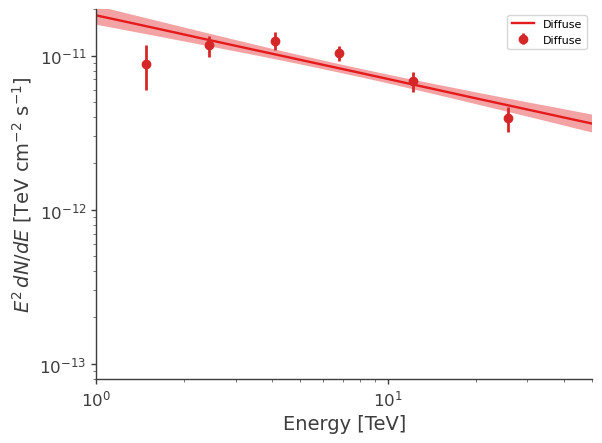

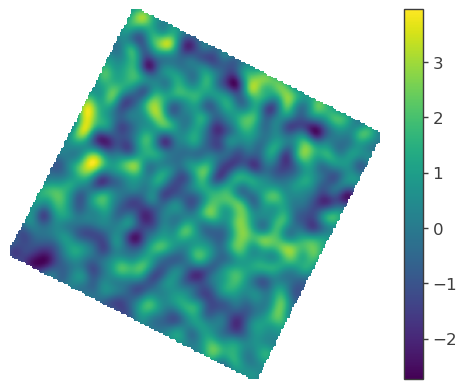

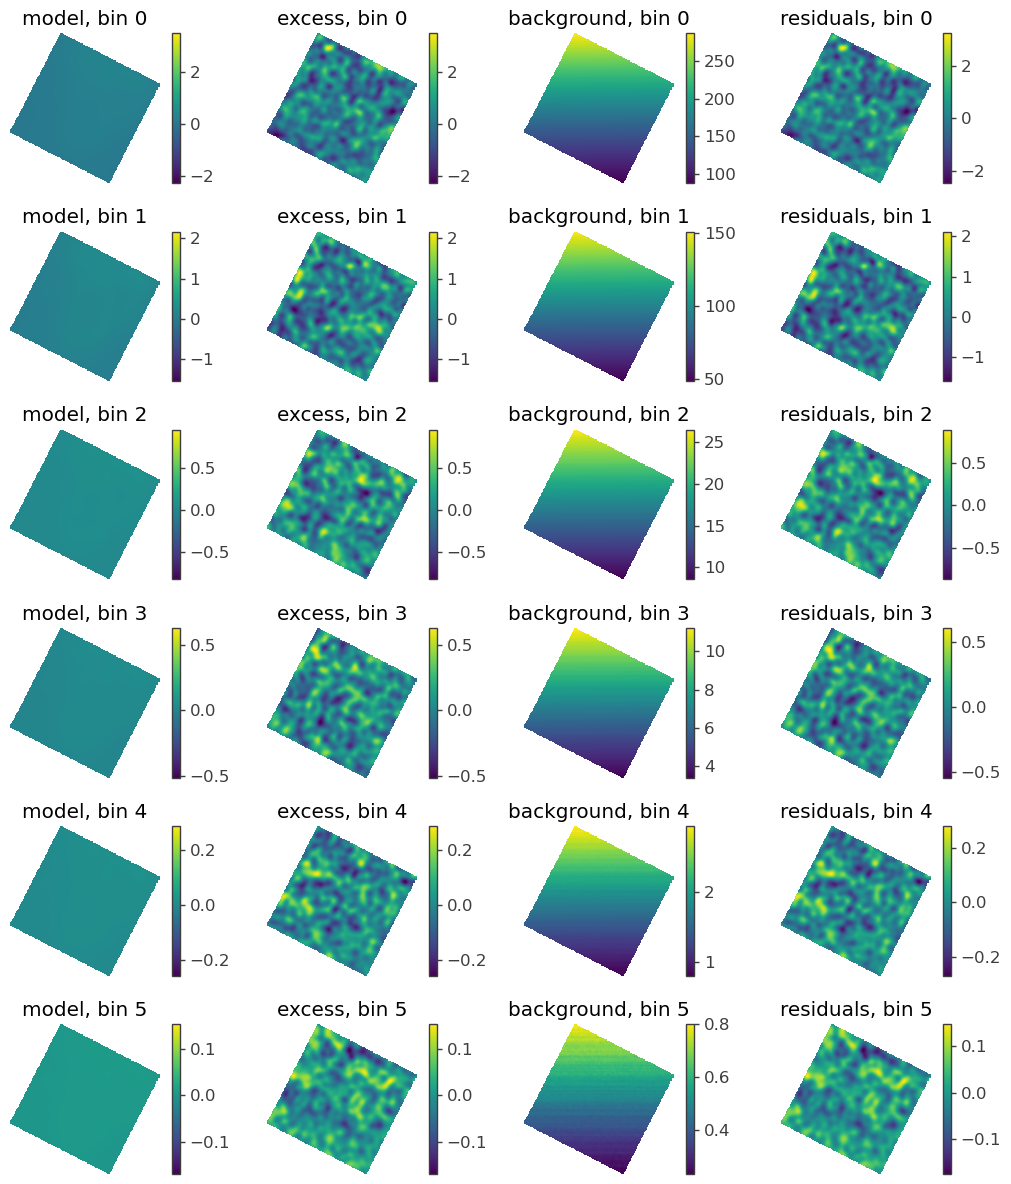

<Figure size 640x480 with 0 Axes>

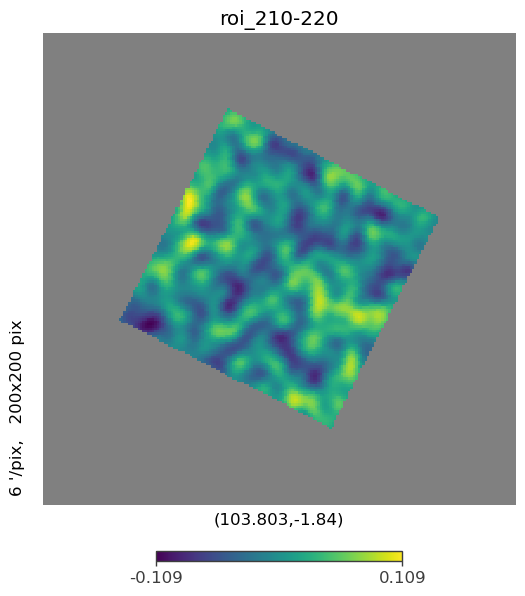

PSR:  1 103.04629166666666 -1.7084166666666667 J0652-0142
PSR:  2 104.563375 0.3764722222222222 J0658+0022
SNR:  1 102.70833333333333 -0.5 G213.0-00.6
3FHL:  1 106.53466 2.7987144 3FHL J0706.1+0247
3FHL:  2 107.447716 -2.931035 3FHL J0709.7-0255
4FGL:  1 100.4371 -3.3466 4FGL J0641.7-0320
4FGL:  2 101.6311 0.3035 4FGL J0646.5+0018
4FGL:  3 101.9494 0.5215 4FGL J0647.7+0031
4FGL:  4 103.8282 -0.631 4FGL J0655.3-0037
4FGL:  5 104.0765 -3.3686 4FGL J0656.3-0322
4FGL:  6 104.6788 -4.1187 4FGL J0658.7-0407c
4FGL:  7 105.3271 -4.0587 4FGL J0701.3-0403
4FGL:  8 105.3455 -3.4526 4FGL J0701.3-0327c
4FGL:  9 105.8367 -0.8436 4FGL J0703.3-0050
4FGL:  10 106.457 -0.0687 4FGL J0705.8-0004
4FGL:  11 106.5454 2.7772 4FGL J0706.1+0246
4FGL:  12 107.4451 -2.9301 4FGL J0709.7-0255
YMC:  1 100.97227919872333 1.3967647955299005 Teutsch_13
YMC:  2 101.27258936928233 0.2417433695032403 Dolidze_25
YMC:  3 102.20323058506654 0.38166121806046543 Bochum_2
YMC:  4 103.08078338925812 2.1916175205227857 Alessi_59


Best fit values:

result             unit
parameter                                                                 
Diffuse.spectrum.main.PowerlawM.K  (6.6 +/- 2.9) x 10^-22  1 / (keV s cm2)

Correlation matrix:

1.00

Values of -log(likelihood) at the minimum:

-log(likelihood)
WCDA        1147.982558
total       1147.982558

Values of statistical measures:

statistical measures
AIC           2297.965137
BIC           2308.081307

Best fit values:

result             unit
parameter                                                                 
Diffuse.spectrum.main.PowerlawM.K  (6.4 +/- 2.9) x 10^-22  1 / (keV s cm2)

Correlation matrix:

1.00

Values of -log(likelihood) at the minimum:

-log(likelihood)
WCDA        1135.665237
total       1135.665237

Values of statistical measures:

statistical measures
AIC           2273.330495
BIC           2283.446665

Best fit values:

result             unit
parameter                                                                 
Diffuse.spectrum.main.PowerlawM.K  (1.2 +/- 0.4) x 10^-21  1 / (keV s cm2)

Correlation matrix:

1.00

Values of -log(likelihood) at the minimum:

-log(likelihood)
WCDA        1141.679059
total       1141.679059

Values of statistical measures:

statistical measures
AIC           2285.358139
BIC           2295.474309

Best fit values:

result             unit
parameter                                                             
Diffuse.spectrum.main.PowerlawM.K  (9 +/- 4) x 10^-22  1 / (keV s cm2)

Correlation matrix:

1.00

Values of -log(likelihood) at the minimum:

-log(likelihood)
WCDA        1122.656612
total       1122.656612

Values of statistical measures:

statistical measures
AIC           2247.313246
BIC           2257.429415

Best fit values:

result             unit
parameter                                                             
Diffuse.spectrum.main.PowerlawM.K  (2 +/- 5) x 10^-22  1 / (keV s cm2)

Correlation matrix:

1.00

Values of -log(likelihood) at the minimum:

-log(likelihood)
WCDA        1067.074269
total       1067.074269

Values of statistical measures:

statistical measures
AIC            2136.14856
BIC            2146.26473

Best fit values:

result             unit
parameter                                                             
Diffuse.spectrum.main.PowerlawM.K  (6 +/- 6) x 10^-22  1 / (keV s cm2)

Correlation matrix:

1.00

Values of -log(likelihood) at the minimum:

-log(likelihood)
WCDA         1001.92197
total        1001.92197

Values of statistical measures:

statistical measures
AIC           2005.843962
BIC           2015.960132


100%|██████████| 6/6 [00:20<00:00,  3.35s/it]


processing MLE analyses:   0%|          | 0/1 [00:00<?, ?it/s]

Propagating errors:   0%|          | 0/30 [00:00<?, ?it/s]

20:28:45 INFO      Region of Interest:                                                                   ]8;id=735810;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=584710;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#291\291]8;;\

         INFO      -------------------                                                                   ]8;id=700253;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=320455;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#292\292]8;;\

         INFO      HealpixMapROI: Center (R.A., Dec) = (108.428, -10.724), model radius:     ]8;id=591812;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/region_of_interest/healpix_map_roi.py\healpix_map_roi.py]8;;\:]8;id=200241;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/region_of_interest/healpix_map_roi.py#134\134]8;;\
                  8.000 deg, display radius: 6.000 deg, threshold = 0.50                                           

         INFO                                                                                            ]8;id=995525;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=126566;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#295\295]8;;\

         INFO      Flat sky projection:                                                                  ]8;id=71101;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=360844;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#296\296]8;;\

         INFO      --------------------                                                                  ]8;id=193102;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=244002;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#297\297]8;;\

         INFO      Width x height 80 x 80 px                                                             ]8;id=813383;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=679378;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#299\299]8;;\

         INFO      Pixel sizes: 0.2 deg                                                                  ]8;id=231903;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=255812;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#304\304]8;;\

         INFO                                                                                            ]8;id=728018;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=297615;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#307\307]8;;\

         INFO      Response:                                                                             ]8;id=530454;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=127088;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#308\308]8;;\

         INFO      ---------                                                                             ]8;id=330678;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=940280;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#309\309]8;;\

         INFO      Response file:                                                                   ]8;id=446106;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/response/response.py\response.py]8;;\:]8;id=221367;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/response/response.py#340\340]8;;\
                  /data/home/cwy/Science/3MLWCDA/Standard/src/../../data/DR_ihep_MK2_newoldDRpsf.ro                
                  ot                                                                                               

         INFO      Number of dec bins: 110                                                          ]8;id=244984;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/response/response.py\response.py]8;;\:]8;id=839173;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/response/response.py#341\341]8;;\

         INFO      Number of energy/nHit planes per dec bin_name: 6                                 ]8;id=852383;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/response/response.py\response.py]8;;\:]8;id=255816;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/response/response.py#344\344]8;;\

         INFO                                                                                            ]8;id=454867;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=689700;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#313\313]8;;\

         INFO      Map Tree:                                                                             ]8;id=250449;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=53498;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#314\314]8;;\

         INFO      ----------                                                                            ]8;id=744807;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=279129;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#315\315]8;;\

Bin  Nside Scheme    Obs counts    Bkg counts   obs/bkg  Pixels in ROI   
0   0   1024   RING  2.056087e+06  2.056486e+06  0.999806          30455  \
1   1   1024   RING  1.137760e+06  1.138220e+06  0.999596          30455   
2   2   1024   RING  1.999126e+05  1.994535e+05  1.002302          30455   
3   3   1024   RING  7.818315e+04  7.829807e+04  0.998532          30455   
4   4   1024   RING  1.818788e+04  1.807909e+04  1.006017          30455   
5   5   1024   RING  5.062561e+03  5.120397e+03  0.988705          30455   

   Area (deg^2)  
0     99.846437  
1     99.846437  
2     99.846437  
3     99.846437  
4     99.846437  
5     99.846437

         INFO      This Map Tree contains 795.961 transits in the first bin                         ]8;id=197514;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/maptree/map_tree.py\map_tree.py]8;;\:]8;id=933321;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/maptree/map_tree.py#149\149]8;;\

         INFO      Total data size: 2.92 Mb                                                         ]8;id=298530;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/maptree/map_tree.py\map_tree.py]8;;\:]8;id=484965;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/maptree/map_tree.py#151\151]8;;\

         INFO                                                                                            ]8;id=499867;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=604842;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#319\319]8;;\

         INFO      Active energy/nHit planes (6):                                                        ]8;id=196763;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=607348;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#321\321]8;;\

         INFO      -------------------------------                                                       ]8;id=532806;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=889798;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#322\322]8;;\

         INFO      ['0', '1', '2', '3', '4', '5']                                                        ]8;id=470153;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=468125;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#323\323]8;;\

20:28:46 INFO      Set diffuse range: [217, 231] [-7, 7]                                               ]8;id=534128;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=703093;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#852\852]8;;\

         INFO      ra dec coner:                                                                       ]8;id=429190;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=766622;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#853\853]8;;\

         INFO      (98.44939332981161, -6.790369333237522)                                             ]8;id=335223;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=968356;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#854\854]8;;\

         INFO      (104.79605025907145, -19.240851383544594)                                           ]8;id=68732;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=384983;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#855\855]8;;\

         INFO      (117.63220301253354, -12.615015899423886)                                           ]8;id=903495;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=636266;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#856\856]8;;\

         INFO      (110.94047847279835, -0.4065837886817416)                                           ]8;id=62490;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=907772;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#857\857]8;;\

20:28:47 INFO      diffuse file path: ../../data/Diffuse_dust_bkg_template.fits                        ]8;id=350181;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=864542;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#914\914]8;;\

Model summary:
==============

                  N
Point sources     0
Extended sources  1
Particle sources  0

Free parameters (2):
--------------------

                                      value min_value max_value   
Diffuse.spectrum.main.Powerlaw.K        0.0       0.0       0.0  \
Diffuse.spectrum.main.Powerlaw.index -2.733      -4.0      -1.0   

                                                unit  
Diffuse.spectrum.main.Powerlaw.K      keV-1 s-1 cm-2  
Diffuse.spectrum.main.Powerlaw.index                  

Fixed parameters (4):
---------------------

                                                                                value   
Diffuse.SpatialTemplate_2D.K                                                      1.0  \
Diffuse.SpatialTemplate_2D.hash     2356332354844148632905023601155215737538703045...   
Diffuse.SpatialTemplate_2D.ihdu                                                   0.0   
Diffuse.spectrum.main.Powerlaw.piv                                       3000000000.0   

                                   min_value max_value   unit  
Diffuse.SpatialTemplate_2D.K            None      None  deg-2  
Diffuse.SpatialTemplate_2D.hash         None      None         
Diffuse.SpatialTemplate_2D.ihdu          0.0      None         
Diffuse.spectrum.main.Powerlaw.piv      None      None    keV  

Properties (2):
--------------------

                                                                          value   
Diffuse.SpatialTemplate_2D.fits_file  ../../data/Diffuse_dust_bkg_template.fits  \
Diffuse.SpatialTemplate_2D.frame                                           icrs   

                                                            allowed values  
Diffuse.SpatialTemplate_2D.fits_file                                  None  
Diffuse.SpatialTemplate_2D.frame      [icrs, galactic, fk5, fk4, fk4_no_e]  

Linked parameters (0):
----------------------

(none)

Independent variables:
----------------------

(none)

Linked functions (0):
----------------------

(none)

20:28:47 INFO      Considering 18 dec bins for extended source Diffuse              ]8;id=769085;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=963110;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#89\89]8;;\

         INFO      Central bin is bin at Declination = -9.867                       ]8;id=661485;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=210113;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#98\98]8;;\

         INFO      set the minimizer to minuit                                             ]8;id=198934;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=501397;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py#1042\1042]8;;\

         INFO      set the minimizer to ROOT                                               ]8;id=571916;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=662963;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py#1059\1059]8;;\

Best fit values:

result   
parameter                                                          
Diffuse.spectrum.main.Powerlaw.K      (0.013 -0.013 +8) x 10^-21  \
Diffuse.spectrum.main.Powerlaw.index         (-0.4 +/- 1.2) x 10   

                                                 unit  
parameter                                              
Diffuse.spectrum.main.Powerlaw.K      1 / (keV s cm2)  
Diffuse.spectrum.main.Powerlaw.index

Correlation matrix:

1.00 0.65
0.65 1.00

Values of -log(likelihood) at the minimum:

-log(likelihood)
WCDA        6254.884942
total       6254.884942

Values of statistical measures:

statistical measures
AIC          12513.769949
BIC          12534.001413

Smoothing planes:   0%|          | 0/6 [00:00<?, ?it/s]

(108.720703125, -5.866650359896198)


<Figure size 640x480 with 0 Axes>

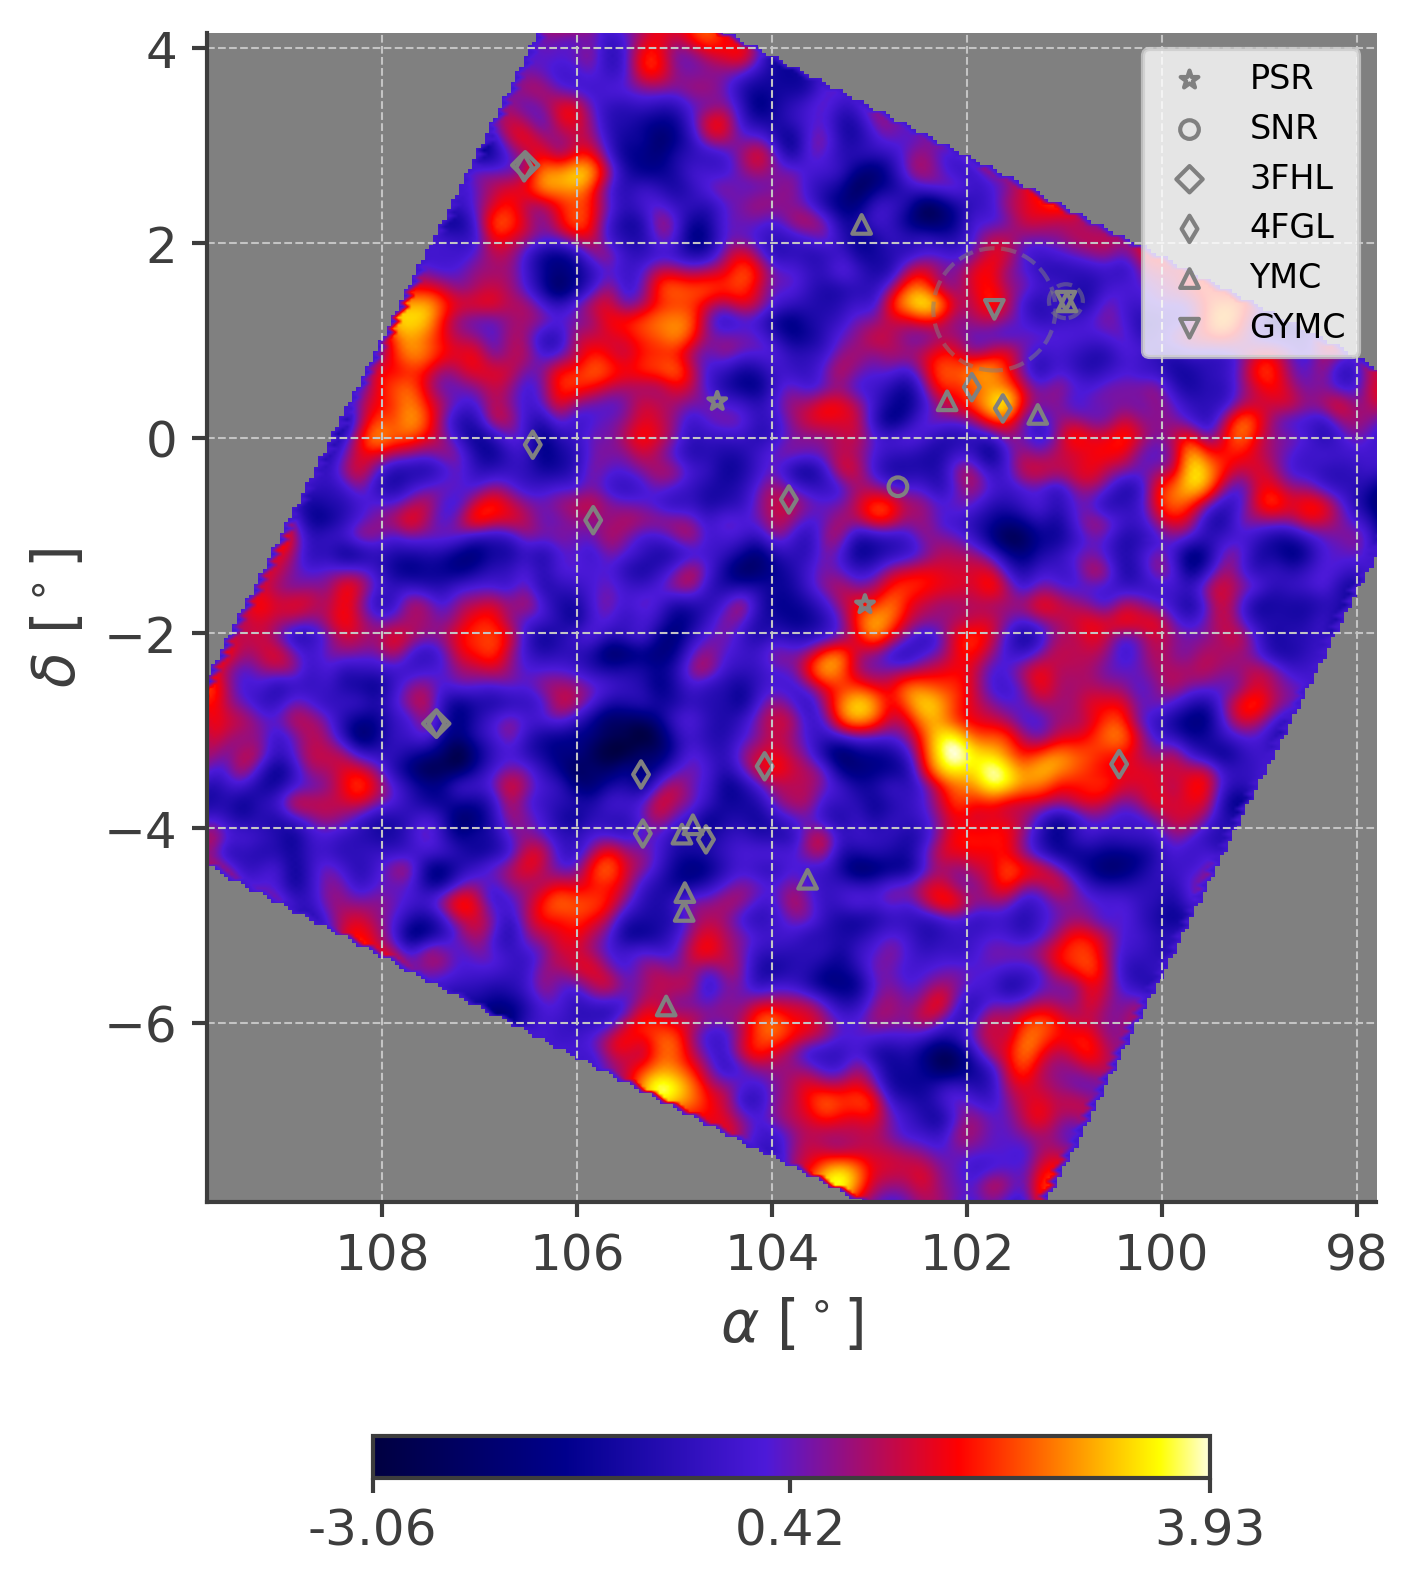

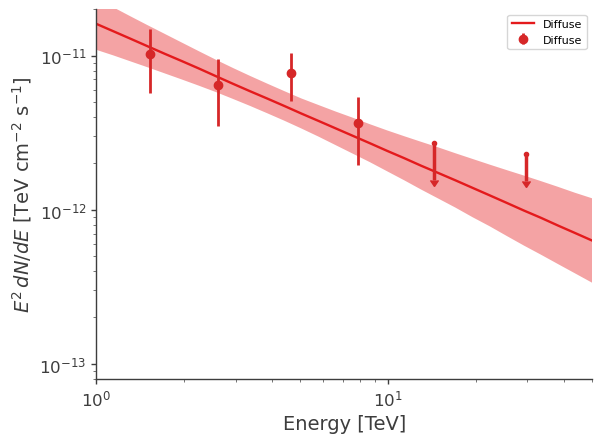

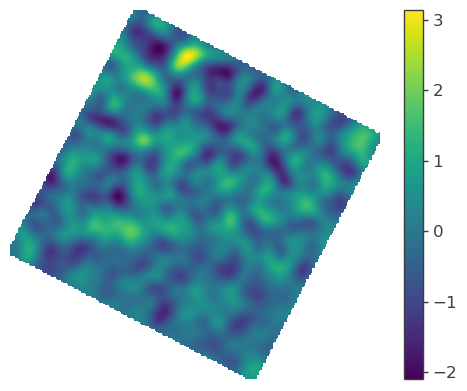

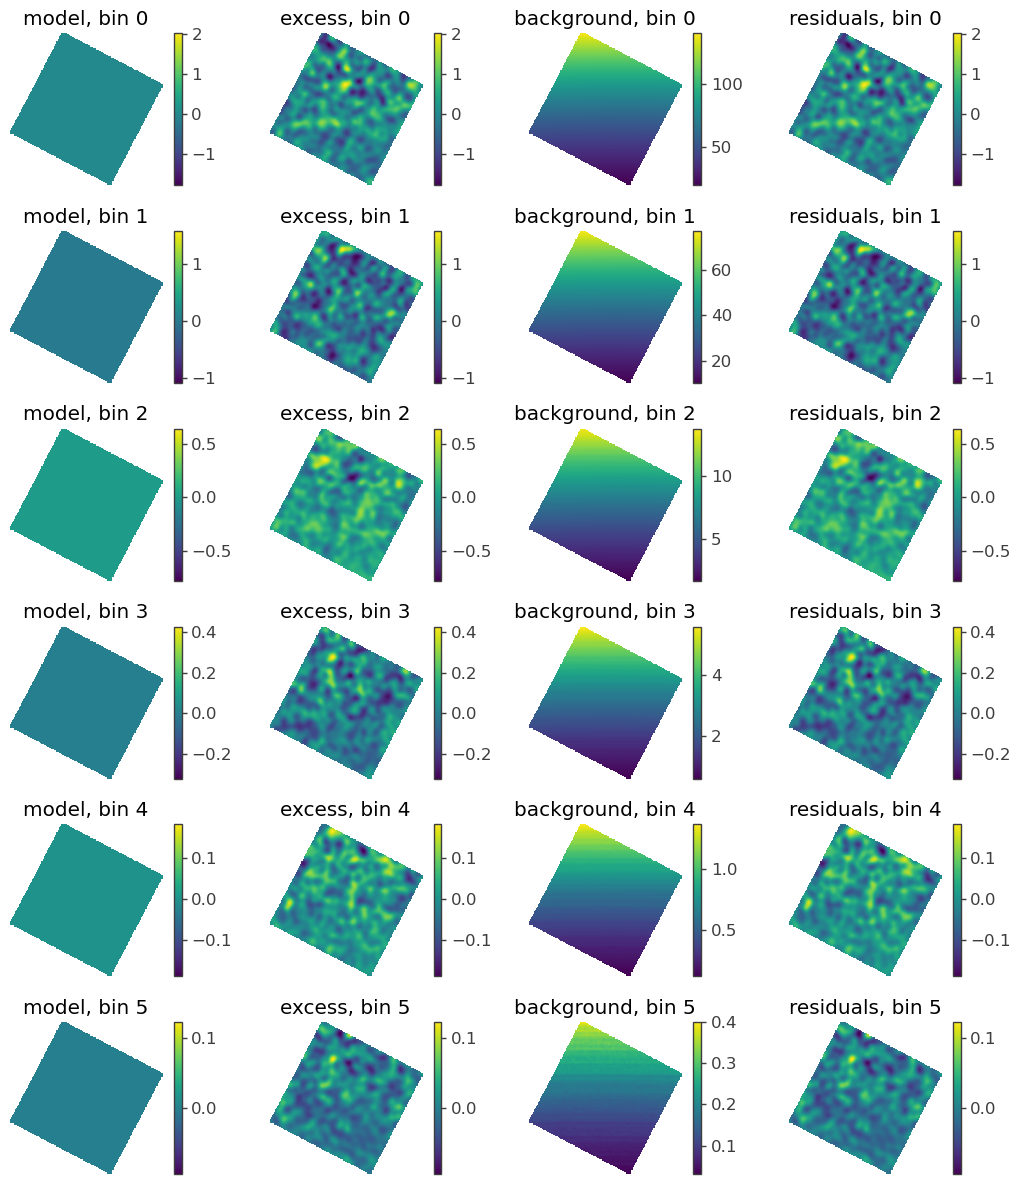

<Figure size 640x480 with 0 Axes>

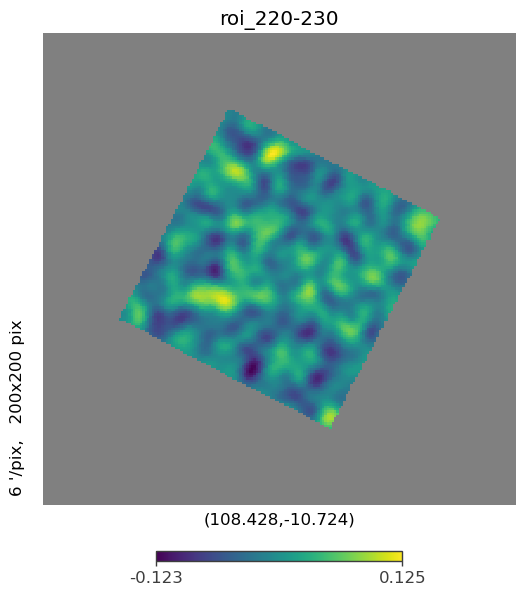

PSR:  1 111.25166666666665 -16.596055555555555 J0725-1635
PSR:  2 112.31854166666666 -14.810222222222222 J0729-1448
PSR:  3 113.49999999999999 -15.983333333333333 J0734-1559
3FHL:  1 107.29887 -15.43226 3FHL J0709.1-1525
3FHL:  2 110.75446 -7.535653 3FHL J0723.0-0732
3FHL:  3 111.392876 -5.073363 3FHL J0725.5-0504
3FHL:  4 111.43205 -5.8146234 3FHL J0725.7-0548
3FHL:  5 112.576195 -11.688636 3FHL J0730.3-1141
3FHL:  6 112.64841 -5.597354 3FHL J0730.5-0535
3FHL:  7 113.67249 -16.003048 3FHL J0734.6-1600
4FGL:  1 102.5717 -16.6012 4FGL J0650.2-1636
4FGL:  2 103.4642 -13.5104 4FGL J0653.8-1330
4FGL:  3 105.8287 -10.7092 4FGL J0703.3-1042
4FGL:  4 106.0177 -11.8863 4FGL J0704.0-1153c
4FGL:  5 106.1553 -10.9241 4FGL J0704.6-1055c
4FGL:  6 106.2319 -10.1229 4FGL J0704.9-1007c
4FGL:  7 107.295 -10.5693 4FGL J0709.1-1034c
4FGL:  8 107.3095 -15.4512 4FGL J0709.2-1527
4FGL:  9 107.8352 -9.7145 4FGL J0711.3-0942
4FGL:  10 108.9266 -11.48 4FGL J0715.7-1128
4FGL:  11 109.0239 -8.45 4FGL J0716.0-082

Best fit values:

result             unit
parameter                                                             
Diffuse.spectrum.main.PowerlawM.K  (0 +/- 4) x 10^-22  1 / (keV s cm2)

Correlation matrix:

1.00

Values of -log(likelihood) at the minimum:

-log(likelihood)
WCDA        1068.280292
total       1068.280292

Values of statistical measures:

statistical measures
AIC           2138.560606
BIC           2148.676349

Best fit values:

result             unit
parameter                                                              
Diffuse.spectrum.main.PowerlawM.K  (-3 +/- 6) x 10^-22  1 / (keV s cm2)

Correlation matrix:

1.00

Values of -log(likelihood) at the minimum:

-log(likelihood)
WCDA        1094.863873
total       1094.863873

Values of statistical measures:

statistical measures
AIC           2191.727768
BIC           2201.843511

Best fit values:

result             unit
parameter                                                                 
Diffuse.spectrum.main.PowerlawM.K  (1.3 +/- 1.5) x 10^-21  1 / (keV s cm2)

Correlation matrix:

1.00

Values of -log(likelihood) at the minimum:

-log(likelihood)
WCDA        1100.412783
total       1100.412783

Values of statistical measures:

statistical measures
AIC           2202.825589
BIC           2212.941332

Best fit values:

result             unit
parameter                                                                  
Diffuse.spectrum.main.PowerlawM.K  (-1.1 +/- 2.3) x 10^-21  1 / (keV s cm2)

Correlation matrix:

1.00

Values of -log(likelihood) at the minimum:

-log(likelihood)
WCDA        1037.984462
total       1037.984462

Values of statistical measures:

statistical measures
AIC           2077.968947
BIC           2088.084690

Best fit values:

result             unit
parameter                                                             
Diffuse.spectrum.main.PowerlawM.K  (5 +/- 4) x 10^-21  1 / (keV s cm2)

Correlation matrix:

1.00

Values of -log(likelihood) at the minimum:

-log(likelihood)
WCDA        1031.244796
total       1031.244796

Values of statistical measures:

statistical measures
AIC           2064.489613
BIC           2074.605356

Best fit values:

result             unit
parameter                                                              
Diffuse.spectrum.main.PowerlawM.K  (-6 +/- 7) x 10^-21  1 / (keV s cm2)

Correlation matrix:

1.00

Values of -log(likelihood) at the minimum:

-log(likelihood)
WCDA         920.516548
total        920.516548

Values of statistical measures:

statistical measures
AIC           1843.033117
BIC           1853.148860



100%|██████████| 6/6 [00:17<00:00,  2.92s/it]


processing MLE analyses:   0%|          | 0/1 [00:00<?, ?it/s]

Propagating errors:   0%|          | 0/30 [00:00<?, ?it/s]

20:31:09 INFO      Region of Interest:                                                                   ]8;id=596424;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=684642;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#291\291]8;;\

         INFO      -------------------                                                                   ]8;id=810703;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=105578;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#292\292]8;;\

         INFO      HealpixMapROI: Center (R.A., Dec) = (113.333, -19.535), model radius:     ]8;id=847269;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/region_of_interest/healpix_map_roi.py\healpix_map_roi.py]8;;\:]8;id=673149;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/region_of_interest/healpix_map_roi.py#134\134]8;;\
                  8.000 deg, display radius: 6.000 deg, threshold = 0.50                                           

         INFO                                                                                            ]8;id=697112;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=780393;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#295\295]8;;\

         INFO      Flat sky projection:                                                                  ]8;id=960749;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=187762;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#296\296]8;;\

         INFO      --------------------                                                                  ]8;id=367179;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=418152;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#297\297]8;;\

         INFO      Width x height 80 x 80 px                                                             ]8;id=433415;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=628680;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#299\299]8;;\

         INFO      Pixel sizes: 0.2 deg                                                                  ]8;id=722568;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=709072;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#304\304]8;;\

         INFO                                                                                            ]8;id=241250;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=107334;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#307\307]8;;\

         INFO      Response:                                                                             ]8;id=271143;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=389909;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#308\308]8;;\

         INFO      ---------                                                                             ]8;id=282583;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=366076;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#309\309]8;;\

         INFO      Response file:                                                                   ]8;id=304676;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/response/response.py\response.py]8;;\:]8;id=901364;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/response/response.py#340\340]8;;\
                  /data/home/cwy/Science/3MLWCDA/Standard/src/../../data/DR_ihep_MK2_newoldDRpsf.ro                
                  ot                                                                                               

         INFO      Number of dec bins: 110                                                          ]8;id=632418;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/response/response.py\response.py]8;;\:]8;id=683196;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/response/response.py#341\341]8;;\

         INFO      Number of energy/nHit planes per dec bin_name: 6                                 ]8;id=118825;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/response/response.py\response.py]8;;\:]8;id=939674;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/response/response.py#344\344]8;;\

         INFO                                                                                            ]8;id=725946;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=487916;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#313\313]8;;\

         INFO      Map Tree:                                                                             ]8;id=885804;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=805311;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#314\314]8;;\

         INFO      ----------                                                                            ]8;id=407408;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=719101;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#315\315]8;;\

Bin  Nside Scheme     Obs counts     Bkg counts   obs/bkg  Pixels in ROI   
0   0   1024   RING  324563.799891  324238.658262  1.001003          17000  \
1   1   1024   RING  180336.903936  179907.037414  1.002389          17000   
2   2   1024   RING   30167.667344   29958.626036  1.006978          17000   
3   3   1024   RING   10826.668639   10691.768961  1.012617          17000   
4   4   1024   RING    2238.069690    2147.956310  1.041953          17000   
5   5   1024   RING     623.032193     606.164393  1.027827          17000   

   Area (deg^2)  
0     55.734344  
1     55.734344  
2     55.734344  
3     55.734344  
4     55.734344  
5     55.734344

         INFO      This Map Tree contains 795.961 transits in the first bin                         ]8;id=188885;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/maptree/map_tree.py\map_tree.py]8;;\:]8;id=162734;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/maptree/map_tree.py#149\149]8;;\

         INFO      Total data size: 1.63 Mb                                                         ]8;id=412776;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/maptree/map_tree.py\map_tree.py]8;;\:]8;id=515607;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/maptree/map_tree.py#151\151]8;;\

         INFO                                                                                            ]8;id=106945;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=611959;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#319\319]8;;\

         INFO      Active energy/nHit planes (6):                                                        ]8;id=217463;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=674913;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#321\321]8;;\

         INFO      -------------------------------                                                       ]8;id=664643;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=777287;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#322\322]8;;\

         INFO      ['0', '1', '2', '3', '4', '5']                                                        ]8;id=376558;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=52227;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#323\323]8;;\

20:31:10 INFO      Set diffuse range: [228, 242] [-7, 7]                                               ]8;id=314818;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=922140;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#852\852]8;;\

         INFO      ra dec coner:                                                                       ]8;id=286772;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=769379;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#853\853]8;;\

         INFO      (103.40913236125512, -16.571578726771296)                                           ]8;id=710839;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=234448;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#854\854]8;;\

         INFO      (110.1784854345626, -28.99587967022238)                                             ]8;id=162118;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=888444;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#855\855]8;;\

         INFO      (123.59058831741616, -21.938170569253202)                                           ]8;id=526395;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=758535;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#856\856]8;;\

         INFO      (116.13446694765761, -10.024662580326758)                                           ]8;id=3797;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=648933;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#857\857]8;;\

         INFO      diffuse file path: ../../data/Diffuse_dust_bkg_template.fits                        ]8;id=795769;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=314153;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#914\914]8;;\

Model summary:
==============

                  N
Point sources     0
Extended sources  1
Particle sources  0

Free parameters (2):
--------------------

                                      value min_value max_value   
Diffuse.spectrum.main.Powerlaw.K        0.0       0.0       0.0  \
Diffuse.spectrum.main.Powerlaw.index -2.733      -4.0      -1.0   

                                                unit  
Diffuse.spectrum.main.Powerlaw.K      keV-1 s-1 cm-2  
Diffuse.spectrum.main.Powerlaw.index                  

Fixed parameters (4):
---------------------

                                                                                value   
Diffuse.SpatialTemplate_2D.K                                                      1.0  \
Diffuse.SpatialTemplate_2D.hash     4410406083941586373814720237106393776108333282...   
Diffuse.SpatialTemplate_2D.ihdu                                                   0.0   
Diffuse.spectrum.main.Powerlaw.piv                                       3000000000.0   

                                   min_value max_value   unit  
Diffuse.SpatialTemplate_2D.K            None      None  deg-2  
Diffuse.SpatialTemplate_2D.hash         None      None         
Diffuse.SpatialTemplate_2D.ihdu          0.0      None         
Diffuse.spectrum.main.Powerlaw.piv      None      None    keV  

Properties (2):
--------------------

                                                                          value   
Diffuse.SpatialTemplate_2D.fits_file  ../../data/Diffuse_dust_bkg_template.fits  \
Diffuse.SpatialTemplate_2D.frame                                           icrs   

                                                            allowed values  
Diffuse.SpatialTemplate_2D.fits_file                                  None  
Diffuse.SpatialTemplate_2D.frame      [icrs, galactic, fk5, fk4, fk4_no_e]  

Linked parameters (0):
----------------------

(none)

Independent variables:
----------------------

(none)

Linked functions (0):
----------------------

(none)

20:31:11 INFO      Considering 12 dec bins for extended source Diffuse              ]8;id=774309;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=672274;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#89\89]8;;\

         INFO      Central bin is bin at Declination = -16.451                      ]8;id=43274;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=686457;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#98\98]8;;\

         INFO      set the minimizer to minuit                                             ]8;id=441261;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=277404;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py#1042\1042]8;;\

         INFO      set the minimizer to ROOT                                               ]8;id=929928;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=91015;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py#1059\1059]8;;\

Best fit values:

result   
parameter                                                        
Diffuse.spectrum.main.Powerlaw.K      (1.4 -0.7 +1.2) x 10^-21  \
Diffuse.spectrum.main.Powerlaw.index              -2.9 +/- 0.4   

                                                 unit  
parameter                                              
Diffuse.spectrum.main.Powerlaw.K      1 / (keV s cm2)  
Diffuse.spectrum.main.Powerlaw.index

Correlation matrix:

1.00 -0.76
-0.76  1.00

Values of -log(likelihood) at the minimum:

-log(likelihood)
WCDA         3564.76217
total        3564.76217

Values of statistical measures:

statistical measures
AIC           7133.524458
BIC           7152.589797

Smoothing planes:   0%|          | 0/6 [00:00<?, ?it/s]

(114.25781249999999, -16.529274787336007)


<Figure size 640x480 with 0 Axes>

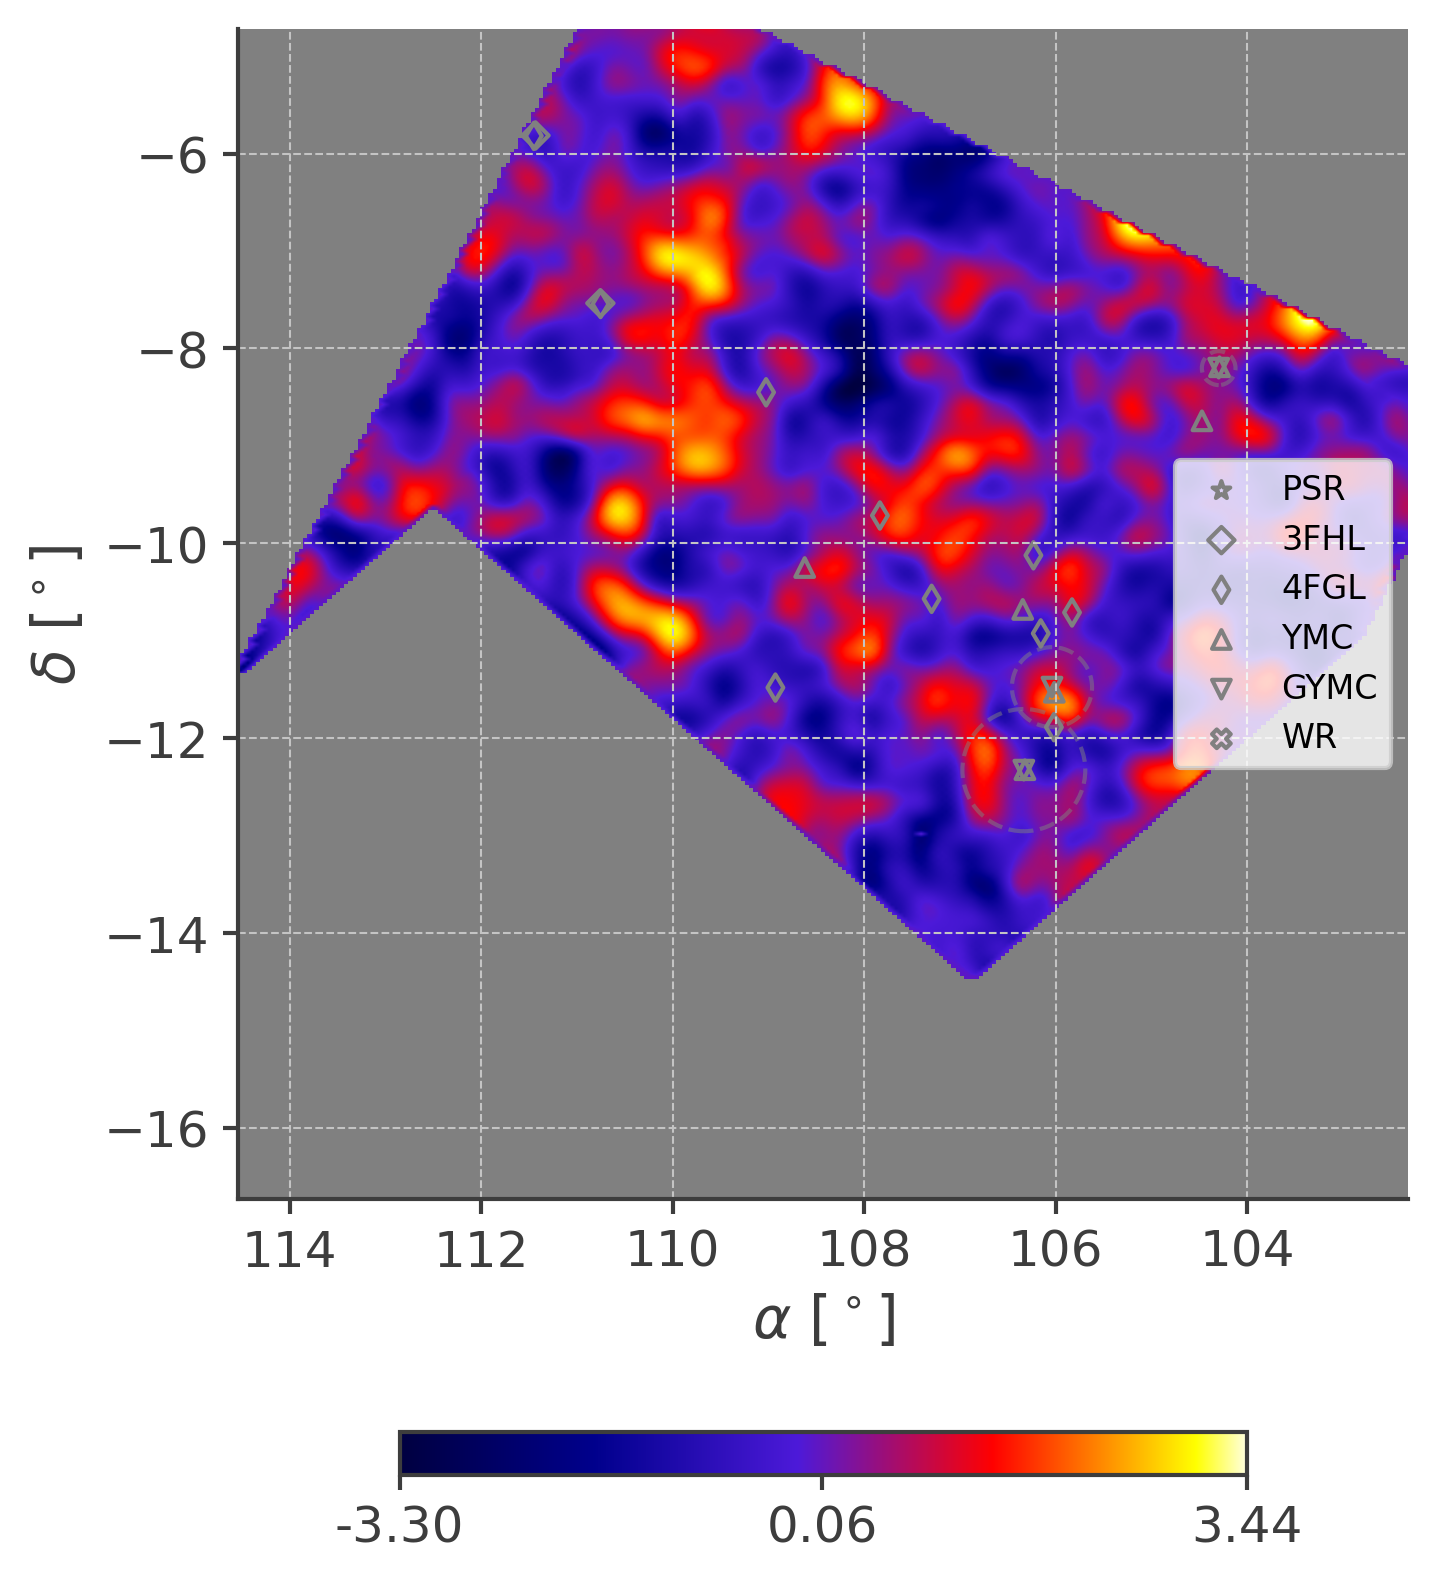

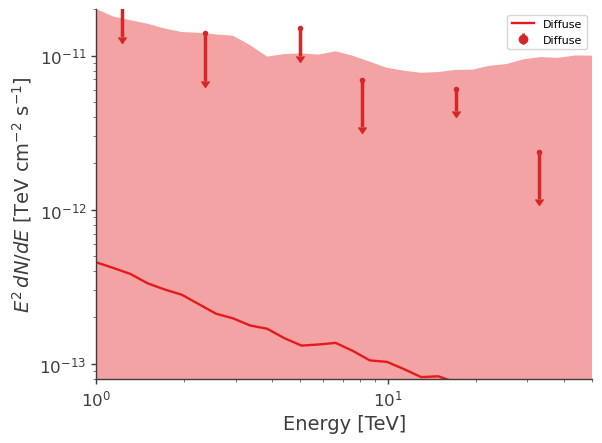

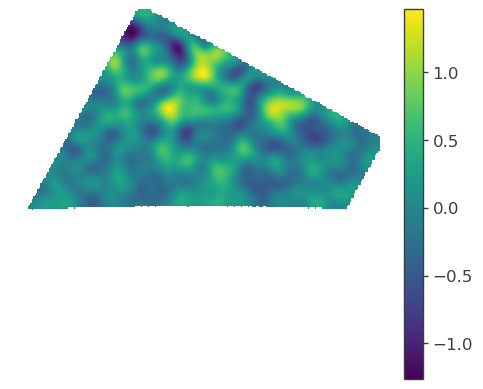

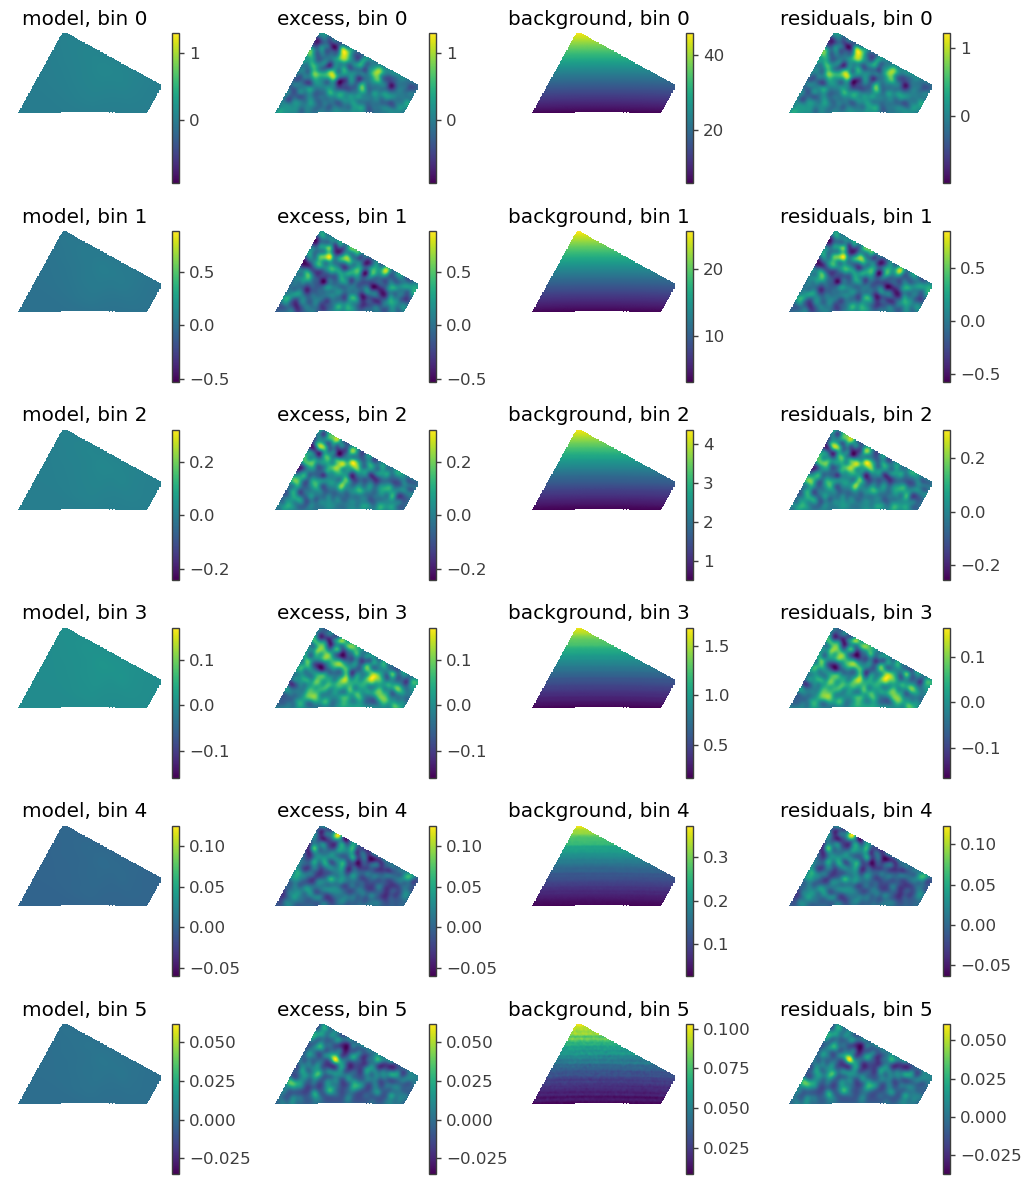

<Figure size 640x480 with 0 Axes>

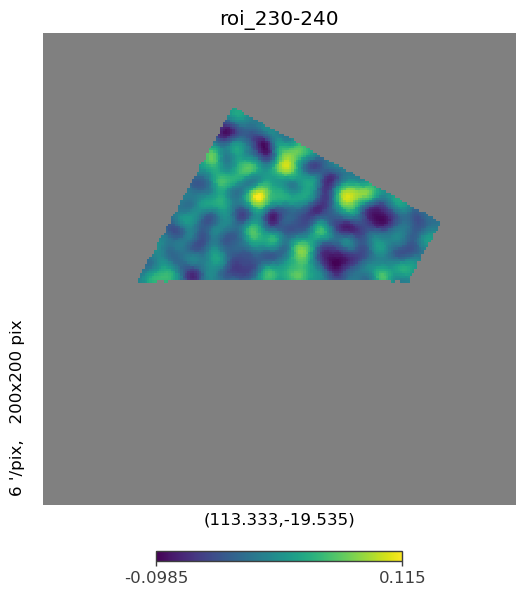

PSR:  1 110.42875 -20.635305555555554 J0721-2038
PSR:  2 111.25166666666665 -16.596055555555555 J0725-1635
PSR:  3 112.31854166666666 -14.810222222222222 J0729-1448
PSR:  4 112.38479166666664 -18.611861111111114 J0729-1836
PSR:  5 113.35249999999999 -23.76561111111111 J0733-2345
PSR:  6 113.49999999999999 -15.983333333333333 J0734-1559
PSR:  7 114.43362499999999 -22.034805555555558 J0737-2202
PSR:  8 119.62112499999999 -15.469083333333334 J0758-1528
3FHL:  1 107.29887 -15.43226 3FHL J0709.1-1525
3FHL:  2 113.67249 -16.003048 3FHL J0734.6-1600
3FHL:  3 118.112175 -16.560575 3FHL J0752.4-1633
4FGL:  1 107.3095 -15.4512 4FGL J0709.2-1527
4FGL:  2 109.2467 -22.3324 4FGL J0716.9-2219
4FGL:  3 110.6924 -23.1513 4FGL J0722.7-2309c
4FGL:  4 112.3416 -14.7608 4FGL J0729.3-1445
4FGL:  5 112.6375 -18.5226 4FGL J0730.5-1831c
4FGL:  6 112.8105 -14.0656 4FGL J0731.2-1403
4FGL:  7 112.892 -19.1709 4FGL J0731.5-1910c
4FGL:  8 113.6891 -15.9917 4FGL J0734.7-1559
4FGL:  9 116.0141 -25.432 4FGL J0744.0-2

Best fit values:

result             unit
parameter                                                                 
Diffuse.spectrum.main.PowerlawM.K  (1.0 +/- 1.1) x 10^-21  1 / (keV s cm2)

Correlation matrix:

1.00

Values of -log(likelihood) at the minimum:

-log(likelihood)
WCDA         642.966956
total        642.966956

Values of statistical measures:

statistical measures
AIC           1287.933952
BIC           1297.466641

Best fit values:

result             unit
parameter                                                                 
Diffuse.spectrum.main.PowerlawM.K  (1.2 +/- 1.1) x 10^-21  1 / (keV s cm2)

Correlation matrix:

1.00

Values of -log(likelihood) at the minimum:

-log(likelihood)
WCDA         639.501765
total        639.501765

Values of statistical measures:

statistical measures
AIC           1281.003568
BIC           1290.536257

Best fit values:

result             unit
parameter                                                                 
Diffuse.spectrum.main.PowerlawM.K  (1.9 +/- 1.7) x 10^-21  1 / (keV s cm2)

Correlation matrix:

1.00

Values of -log(likelihood) at the minimum:

-log(likelihood)
WCDA         623.223962
total        623.223962

Values of statistical measures:

statistical measures
AIC           1248.447962
BIC           1257.980651

Best fit values:

result             unit
parameter                                                                 
Diffuse.spectrum.main.PowerlawM.K  (4.1 +/- 1.8) x 10^-21  1 / (keV s cm2)

Correlation matrix:

1.00

Values of -log(likelihood) at the minimum:

-log(likelihood)
WCDA         624.093097
total        624.093097

Values of statistical measures:

statistical measures
AIC           1250.186234
BIC           1259.718923

Best fit values:

result             unit
parameter                                                                 
Diffuse.spectrum.main.PowerlawM.K  (1.1 +/- 1.8) x 10^-21  1 / (keV s cm2)

Correlation matrix:

1.00

Values of -log(likelihood) at the minimum:

-log(likelihood)
WCDA          590.65454
total         590.65454

Values of statistical measures:

statistical measures
AIC           1183.309119
BIC           1192.841808

Best fit values:

result             unit
parameter                                                                 
Diffuse.spectrum.main.PowerlawM.K  (0.3 +/- 1.6) x 10^-21  1 / (keV s cm2)

Correlation matrix:

1.00

Values of -log(likelihood) at the minimum:

-log(likelihood)
WCDA         442.847248
total        442.847248

Values of statistical measures:

statistical measures
AIC            887.694535
BIC            897.227224


100%|██████████| 6/6 [00:13<00:00,  2.31s/it]


processing MLE analyses:   0%|          | 0/1 [00:00<?, ?it/s]

Propagating errors:   0%|          | 0/30 [00:00<?, ?it/s]

100%|██████████| 35/35 [1:28:47<00:00, 152.21s/it]
Error in <TTreeFormula::Compile>:  Bad numerical expression : "name"


<Figure size 640x480 with 0 Axes>

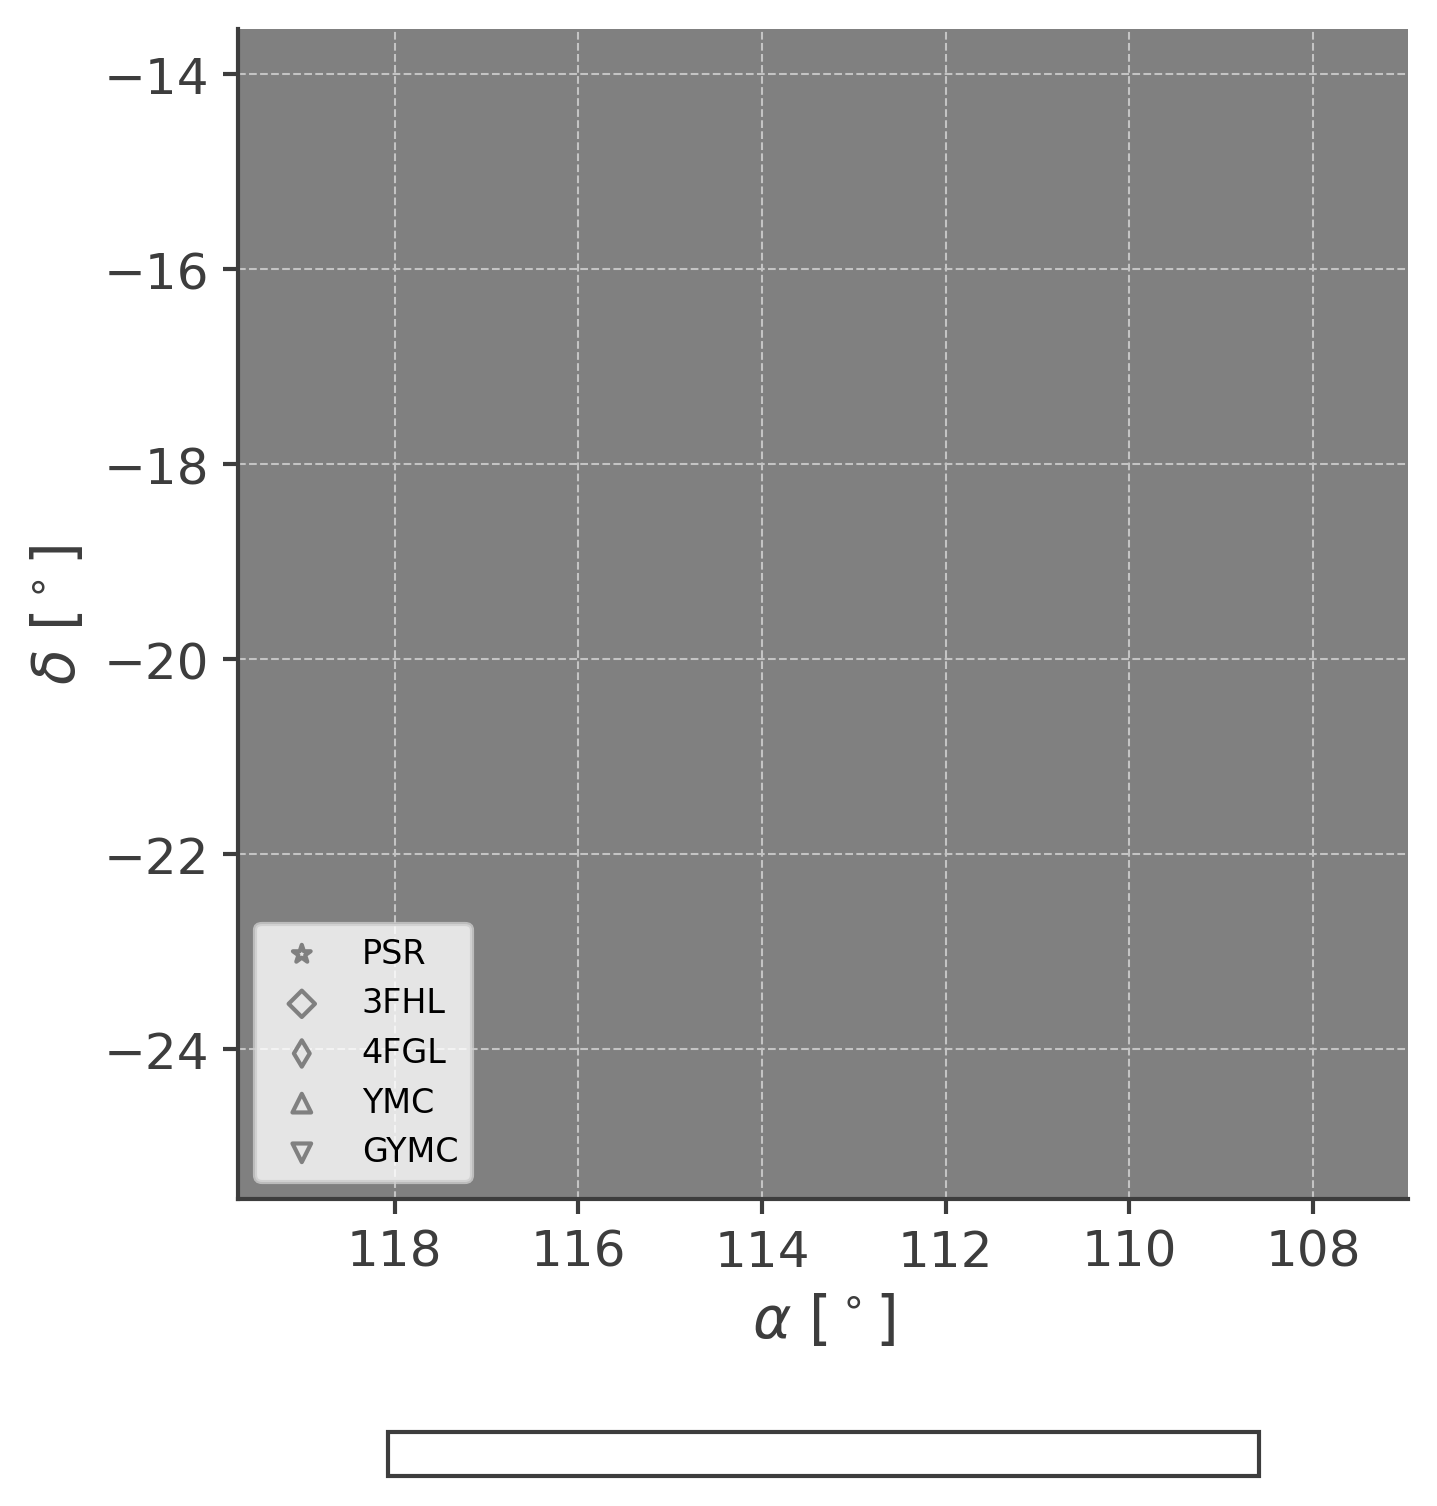

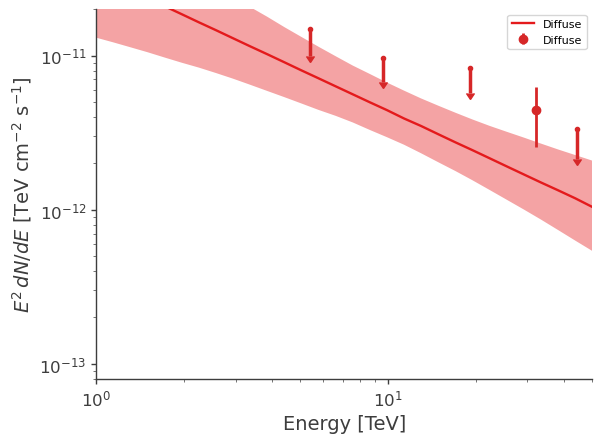

In [2]:
%matplotlib inline
#####   Data Initialize

# maptree = "../../data/gcd_new.root"

# maptree =  "../../data/20210305_20230731_ihep_goodlist.root"
# maptree =  "../../data/20210305_20230731_ihep_no_goodlist.root"
maptree =  "../../data/20210305-20230731_trans_fromhsc.root"

# response = "../../data/DR_ihep_MK2.root"
# response = "../../data/DR_ihep_MK2_newpsf.root"

response = "../../data/DR_ihep_MK2_newoldDRpsf.root"
# response = "../../data/DR_ihep_mk_luoyu.root"
# response = "../../data/DR_ihep_mk_MC1.root"
# response = "../../data/DR_ihep_mk_MC2.root"
# response = "../../data/DR_ihep_MK2_luoyu.root"

region_name="Diffuse"
if not os.path.exists(f'../res/{region_name}/'):
    os.system(f'mkdir ../res/{region_name}/')

nside=2**10
npix=hp.nside2npix(nside)
pixarea = 4 * np.pi/npix


pixIdx = hp.nside2npix(nside) # number of pixels I can get from this nside
pixIdx = np.arange(pixIdx) # pixel index numbers
new_lats = hp.pix2ang(nside, pixIdx)[0] # thetas I need to populate with interpolated theta values
new_lons = hp.pix2ang(nside, pixIdx)[1] # phis, same
c_icrs = SkyCoord(ra=new_lons*180/np.pi*u.degree, dec=90*u.degree-new_lats*180/np.pi*u.degree, frame='icrs')
c_l=c_icrs.galactic.l.deg
c_b=c_icrs.galactic.b.deg

resultsall = []
for i,gl in enumerate(tqdm(range(15,365,10))):
    c_gal = SkyCoord(l=(gl)*u.degree, b=0*u.degree, frame='galactic')
    RA_center=c_gal.icrs.ra.deg
    Dec_center=c_gal.icrs.dec.deg
    if (Dec_center<-20. or Dec_center>80.): continue
    signal=np.zeros(npix,dtype=np.float64)
    mask = ( (c_l< gl + 5) & (c_l > gl - 5) & (c_b <5.) & (c_b>-5) & (90-new_lats/np.pi*180>-20) & (90-new_lats/np.pi*180<80)) #&(new_lats<110/180*np.pi )  & (new_lats > 10/180*np.pi )
        
    signal[mask]=1
    # hp.mollview(signal,title="ROI",norm='hist')
    # hp.graticule()
    ra1,dec1=RA_center, Dec_center

    data_radius = 6.0
    model_radius = 8.0

    roi = HealpixMapROI(ra=ra1,dec=dec1, data_radius=data_radius, model_radius=model_radius, roimap=signal)

    WCDA = HAL("WCDA", maptree, response, roi, flat_sky_pixels_size=0.2)

    #####   Data Situation
    %matplotlib inline
    WCDA.set_active_measurements(0, 5)
    WCDA.display()

    Modelname=f"roi_{gl - 5}-{gl + 5}"
    if not os.path.exists(f'../res/{region_name}/{Modelname}/'):
        os.system(f'mkdir ../res/{region_name}/{Modelname}/')
    fig = WCDA.display_stacked_image(smoothing_kernel_sigma=0.25)
    fig.savefig(f"../res/{region_name}/{Modelname}_counts_all.png",dpi=300)

    lm = my.getcatModel(ra1, dec1, data_radius, model_radius, rtsigma=10,  detector="WCDA", roi=roi, pf=True)

    Diffuse = my.set_diffusebkg(
                ra1, dec1, 7, 7, Kf=False, indexf=False, name=region_name
                )
    
    lm.add_source(Diffuse)

    lm.save(f"../res/{region_name}/{Modelname}/Model_init.yml", overwrite=True)
    lm.display(complete=True)

    result = my.fit(region_name, Modelname, WCDA, lm, 0, 5, mini="ROOT") #, ifgeterror=True
    sources = my.get_sources(lm,result)
    resultsall.append([result, sources])

    resu = my.getressimple(WCDA, lm)
    new_source_idx = np.where(resu==np.ma.max(resu))[0][0]
    new_source_lon_lat=hp.pix2ang(1024,new_source_idx,lonlat=True)
    print(new_source_lon_lat)

    plt.figure()
    hp.gnomview(resu,norm='',rot=[ra1,dec1],xsize=200,ysize=200,reso=6,title=Modelname)
    plt.scatter(new_source_lon_lat[0],new_source_lon_lat[1],marker='x',color='red')
    plt.show()
    plt.savefig(f"../res/{region_name}/{Modelname}_res.png",dpi=300)

    map2, skymapHeader = hp.read_map("../../data/fullsky_WCDA_llh-2.6.fits.gz",h=True)
    map2 = my.maskroi(map2, roi)
    sources.pop("Diffuse")
    fig = my.drawmap(region_name, Modelname, sources, map2, ra1, dec1, rad=2*data_radius, contours=[10000],save=1, 
                    color="Fermi",
                    colors = my.colorall
                    )
    
    Flux_WCDA0, jls0  = my.getdatapoint(WCDA, lm, maptree, response, roi, "Diffuse", ifpowerlawM=1)
    import matplotlib as mpl

    x_Max=50.
    x_Min=1
    y_Min=0.8e-13
    y_Max=2e-11
    fig,ax = plt.subplots()
    plot_spectra(
        result[0].results,
        sources_to_use=["Diffuse"], #,"ext1","ext2","ext4","ext5","ext6","ext7"|
        include_extended=True,
        ene_min=x_Min,
        ene_max=x_Max,
        num_ene=30,
        energy_unit="TeV",
        flux_unit="TeV/(s cm2)",
        subplot=ax,
        )

    my.Draw_sepctrum_points(region_name, Modelname, Flux_WCDA0,"Diffuse","tab:red")

    ax.set_xlim(x_Min,x_Max)
    ax.set_ylim(y_Min,y_Max)
    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.set_ylabel(r"$E^2\,dN/dE$ [TeV cm$^{-2}$ s$^{-1}$]")
    ax.set_xlabel("Energy [TeV]")
    plt.legend()
    plt.savefig(f'../res/{region_name}/{Modelname}/Spectrum.png', dpi=300)
    plt.savefig(f'../res/{region_name}/{Modelname}/Spectrum.pdf')


In [3]:
gc = []
dk = []
de = []
di = []
die = []
den = []
dep = []
dien = []
diep = []
for i in range(len(resultsall)):
    gc.append(range(15,365,10)[i])
    dk.append(resultsall[i][0][1][0].loc["Diffuse.spectrum.main.Powerlaw.K"]["value"])
    de.append(resultsall[i][0][1][0].loc["Diffuse.spectrum.main.Powerlaw.K"]["error"])
    den.append(abs(resultsall[i][0][1][0].loc["Diffuse.spectrum.main.Powerlaw.K"]["negative_error"]))
    dep.append(abs(resultsall[i][0][1][0].loc["Diffuse.spectrum.main.Powerlaw.K"]["positive_error"]))
    di.append(resultsall[i][0][1][0].loc["Diffuse.spectrum.main.Powerlaw.index"]["value"])
    die.append(resultsall[i][0][1][0].loc["Diffuse.spectrum.main.Powerlaw.index"]["error"])
    dien.append(abs(resultsall[i][0][1][0].loc["Diffuse.spectrum.main.Powerlaw.index"]["negative_error"]))
    diep.append(abs(resultsall[i][0][1][0].loc["Diffuse.spectrum.main.Powerlaw.index"]["positive_error"]))
results=[gc,dk,de,den,dep,di,die,dien,diep]
np.save(f"../res/{region_name}/resultsall2.npy",results)

Text(0.5, 0, '$GLON^{o}$')

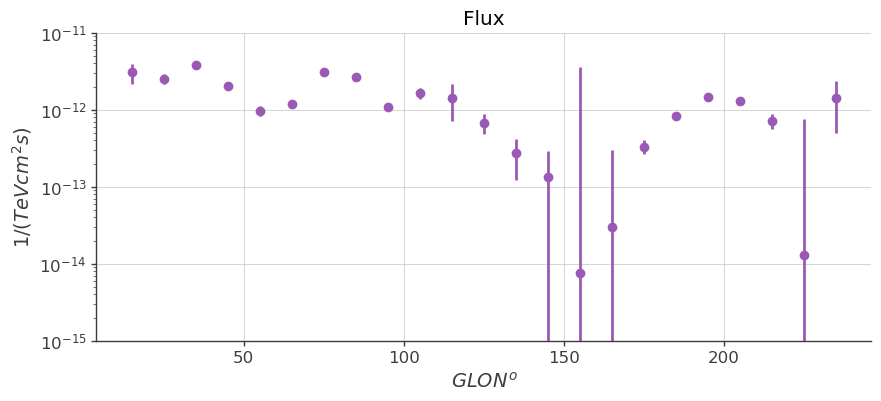

In [53]:
plt.figure(figsize=(10,4)) #
plt.errorbar(gc, np.array(dk)*1e9, [np.array(de)*1e9, np.array(de)*1e9], fmt="o") #np.array(den)*1e9, np.array(dep)*1e9
plt.yscale("log")
plt.title("Flux")
plt.ylim(1e-15, 1e-11)
plt.ylabel(r"$1/(TeV cm^{2} s)$")
plt.grid()
plt.xlabel(r"$GLON^{o}$")

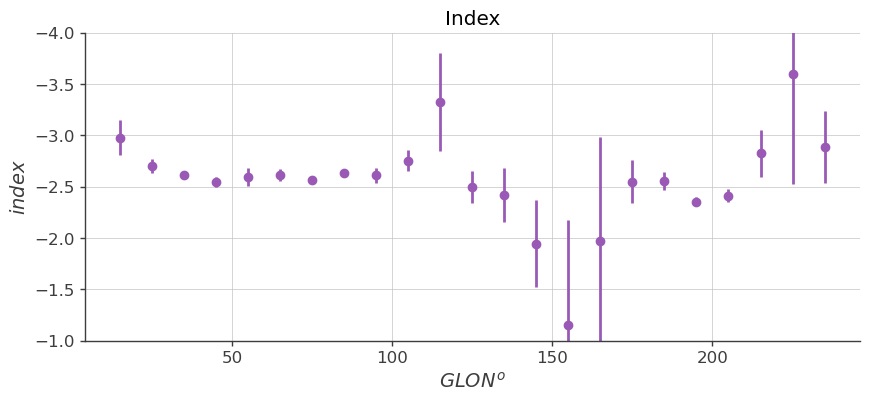

In [54]:
plt.figure(figsize=(10,4)) #
plt.errorbar(gc, di, [die, die], fmt="o") #dien, diep
plt.ylim(-1,-4)
plt.title("Index")
plt.ylabel(r"$index$")
plt.xlabel(r"$GLON^{o}$")
plt.grid()

roi_10-20
roi_20-30
roi_30-40
roi_40-50
roi_50-60
roi_60-70
roi_70-80
roi_80-90


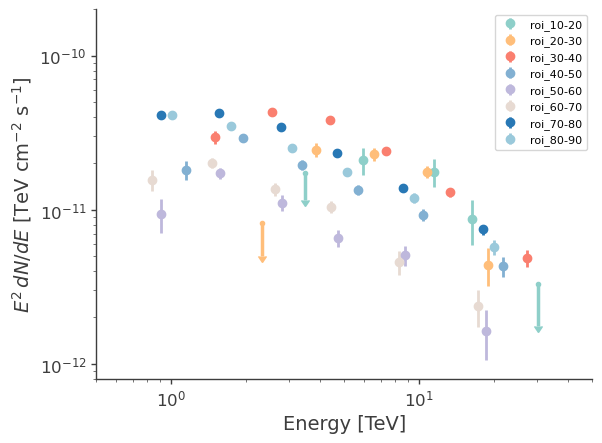

In [55]:
import glob
x_Max=50.
x_Min=0.5
y_Min=0.8e-12
y_Max=2e-10
fig,ax = plt.subplots()
folder_path = "/data/home/cwy/Science/3MLWCDA/Standard/res/Diffuse"
subfolders = glob.glob(folder_path + '/**/', recursive=True)
sorted_files = sorted(subfolders[1:], key=lambda x: int(x.split('_')[1].split('-')[0]))
# 打印所有找到的子文件夹路径
for i,subfolder in enumerate(sorted_files[:8]):
    name = subfolder.split("/")[-2]
    print(name)
    specpath = subfolder+"Spectrum_Diffuse.txt"
    my.Draw_spectrum_fromfile(specpath, label=name, color=my.colorall[i], subplot=ax)

ax.set_xlim(x_Min,x_Max)
ax.set_ylim(y_Min,y_Max)
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_ylabel(r"$E^2\,dN/dE$ [TeV cm$^{-2}$ s$^{-1}$]")
ax.set_xlabel("Energy [TeV]")
ax.legend()

roi_90-100
roi_100-110
roi_110-120
roi_120-130
roi_130-140
roi_140-150


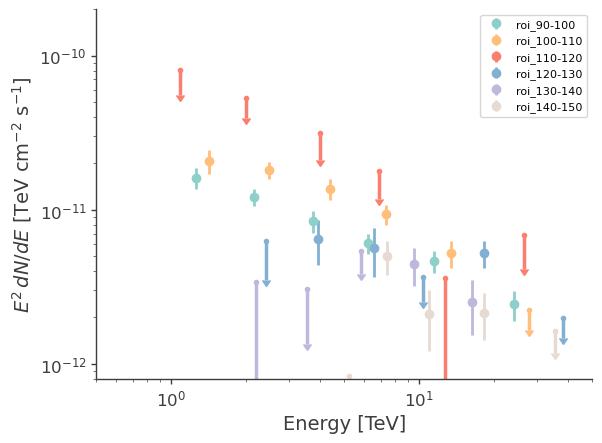

In [57]:
x_Max=50.
x_Min=0.5
y_Min=0.8e-12
y_Max=2e-10
fig,ax = plt.subplots()
folder_path = "/data/home/cwy/Science/3MLWCDA/Standard/res/Diffuse"
subfolders = glob.glob(folder_path + '/**/', recursive=True)
sorted_files = sorted(subfolders[1:], key=lambda x: int(x.split('_')[1].split('-')[0]))
# 打印所有找到的子文件夹路径
for i,subfolder in enumerate(sorted_files[8:14]):
    name = subfolder.split("/")[-2]
    print(name)
    specpath = subfolder+"Spectrum_Diffuse.txt"
    my.Draw_spectrum_fromfile(specpath, label=name, color=my.colorall[i], subplot=ax)

ax.set_xlim(x_Min,x_Max)
ax.set_ylim(y_Min,y_Max)
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_ylabel(r"$E^2\,dN/dE$ [TeV cm$^{-2}$ s$^{-1}$]")
ax.set_xlabel("Energy [TeV]")
ax.legend()

roi_170-180
roi_180-190
roi_190-200
roi_200-210
roi_210-220
roi_220-230
roi_230-240


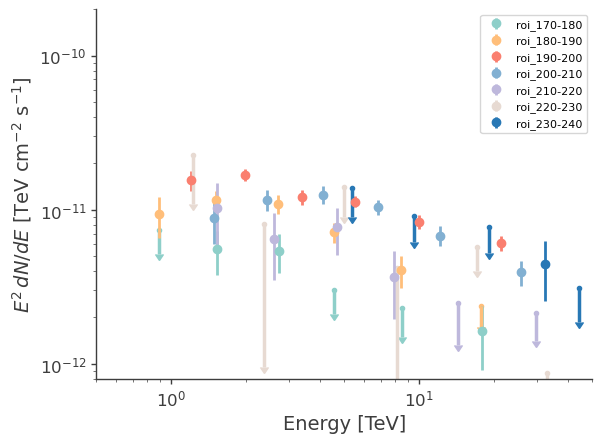

In [59]:
x_Max=50.
x_Min=0.5
y_Min=0.8e-12
y_Max=2e-10
fig,ax = plt.subplots()
folder_path = "/data/home/cwy/Science/3MLWCDA/Standard/res/Diffuse"
subfolders = glob.glob(folder_path + '/**/', recursive=True)
sorted_files = sorted(subfolders[1:], key=lambda x: int(x.split('_')[1].split('-')[0]))
# 打印所有找到的子文件夹路径
for i,subfolder in enumerate(sorted_files[16:23]):
    name = subfolder.split("/")[-2]
    print(name)
    specpath = subfolder+"Spectrum_Diffuse.txt"
    my.Draw_spectrum_fromfile(specpath, label=name, color=my.colorall[i], subplot=ax)

ax.set_xlim(x_Min,x_Max)
ax.set_ylim(y_Min,y_Max)
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_ylabel(r"$E^2\,dN/dE$ [TeV cm$^{-2}$ s$^{-1}$]")
ax.set_xlabel("Energy [TeV]")
ax.legend()